<img src="https://media-exp1.licdn.com/dms/image/C4E1BAQF_UpI5AaG0tQ/company-background_10000/0/1652085437382?e=2147483647&v=beta&t=i5HS1izIkIk8HRtK0OPS6odEgZpuVbjjfcH2wx6ByAI" alt="MarineGEO circle logo"/>

# MBIT School

## Máster Profesional en Data Science e Inteligencia Artificial
### **Módulo 2. Estadística Descriptiva y Diferencial**
#### **Sesión 2. Análisis Exploratorio y Limpieza de Datos**

Pedro Gómez (pegomez.lopez@mbitschool.com)

__Alumnos: Pablo J. de Andrés / Alex Gómez / Antonio M. García / Carlos Luis Valenti__

---
---
# __DESCRIPCIÓN DEL PROBLEMA__
> __Contenido
Link a la descripción del problema: https://www.kaggle.com/code/aparnashastry/building-permit-data-analysis/data?select=Building_Permits.csv__

---
---

In [1]:
# Importación de los módulos principales
import pandas as pd
import numpy as np

# Config de Jupyter para visualización sin limite de columnas y máximo 25 rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)

---
---

# __EJERCICIO 0__
> __Echarle un vistazo a los datos. Carga el dataset y muestra las 25 primeras filas__

---
---

## __SOLUCIÓN 0.1__
* Para subir el dataset a Google Colab, debemos importarlo en la sesión de la libreta con otro código. Posteriormente se puede utilizar Pandas de forma normal.
* Guardamos una copia del csv original en df_permits_source y una copia para trabajar sobre ella en df_permits

## __DESARROLLO 0.1__

### __Subir el Dataset__

In [2]:
# Si trabajas en local o tienes el archivo ya cargado en Google Colab, accede al csv con este código.
import csv
csvfile = './data/Building_Permits.csv'
df_permits_source = pd.read_csv(csvfile)
df_permits = df_permits_source.copy()

C:\Users\pablojdeandres\AppData\Local\Temp\ipykernel_21860\2785281493.py:4: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_permits_source = pd.read_csv(csvfile)


In [3]:
# Si trabajas en google colab, upload el archivo csv.
# Denes subirlo a la sesión o cortará el número de rows que tiene buildin_permits.csv

#from google.colab import files
#uploaded = files.upload()

#import io
#df_permits_source = pd.read_csv(io.BytesIO(uploaded['Building_Permits.csv']))

In [4]:
# Copia de trabajo del csv
df_permits = df_permits_source.copy()

### __Mostrar las primeras 25 filas__

In [5]:
df_permits_source.head(25)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,NaN,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,NaN,NaN,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,0.0,NaN,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,NaN,Indiana,St,NaN,NaN,evac maps,issued,07/06/2017,06/14/2017,07/06/2017,NaN,07/06/2017,NaN,5.0,5.0,NaN,Y,07/01/2018,4000.0,4000.0,apartments,326.0,apartments,326.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,NaN,11th,Av,0.0,NaN,re-roofing,complete,07/12/2017,06/30/2017,06/30/2017,07/12/2017,06/30/2017,NaN,3.0,3.0,NaN,NaN,06/25/2018,12000.0,12000.0,apartments,5.0,apartments,5.0,0.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1468970403692
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465,NaN,Revere,Av,NaN,NaN,streetspace,issued,06/30/2017,06/30/2017,06/30/2017,NaN,06/30/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73005099023611, -122.38784938916618)",1469035175050
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094,NaN,Fell,St,NaN,NaN,street space permit,issued,07/05/2017,07/05/2017,07/05/2017,NaN,07/05/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Lone Mountain/USF,94117.0,"(37.772393498502595, -122.452314

---
---
> __Comprueba el esquema de datos, ¿realizarías algunas modificación? Si es así, impleméntala__

---
---

## __SOLUCIÓN 0.2__
Analizamos las modificaciones que se realizan durante el proceso de Data Wrangling inicial y creamos un listado para llevar un control. Posteriormente, aplicamos las modificaciones que consideramos necesarias y las marcamos en el checkbox


__Listado de procesos comunes del Data Wrangling__

__Data cleaning__
- [x] Renombrado
- [x] Reordenación de columnas
- [x] Conversiones de type
- [x] Comprobar si hay datos duplicados
- [x] Valores faltantes o datos inválidos
- [x] Filtrar subset de data que sea interesante

__Data transformation__
- [x] Comprobar si el formato del dataframe es correcto (wide format vs long format)

__Data enrichment:__
- [x] Añadir columnas nuevas a partir de data de otras
- [x] Convertir datos continuos en discretos
- [x] Agregar data que haga un resumen
- [x] Agregar series temporales en intervalos específicos

## __DESARROLLO 0.2__

### __Comprobación del DataFrame original__

In [6]:
# Filas y columnas del DF
rows, columns = df_permits_source.shape
print(f"El DF tiene {rows} filas y {columns} columnas")

El DF tiene 198900 filas y 43 columnas


In [7]:
# Información del DF con las columnas, Values y Dtype
df_permits_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                                    2947

In [8]:
# Función como .info que genera un DF para el pipeline
def info_stats(df):
    """
    Extrae información como .info() pero devuelve con un total y como DF.. 

    Args:
        df (DataFrame): Un DataFrame de Pandas.

    Return:
        DataFrame con información .info()
    """
    values_count = df.count()
    data_types = df.dtypes
    stats_df = pd.DataFrame({'values_count': values_count, 'dtype': data_types})
    stats_df.loc['Total'] = [values_count.sum(), '-'] # Nueva row con el total de non_nan_counts

    return stats_df

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\pablojdeandres\AppData\Local\Temp\ipykernel_21860\2569866914.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_permits_source.corr()


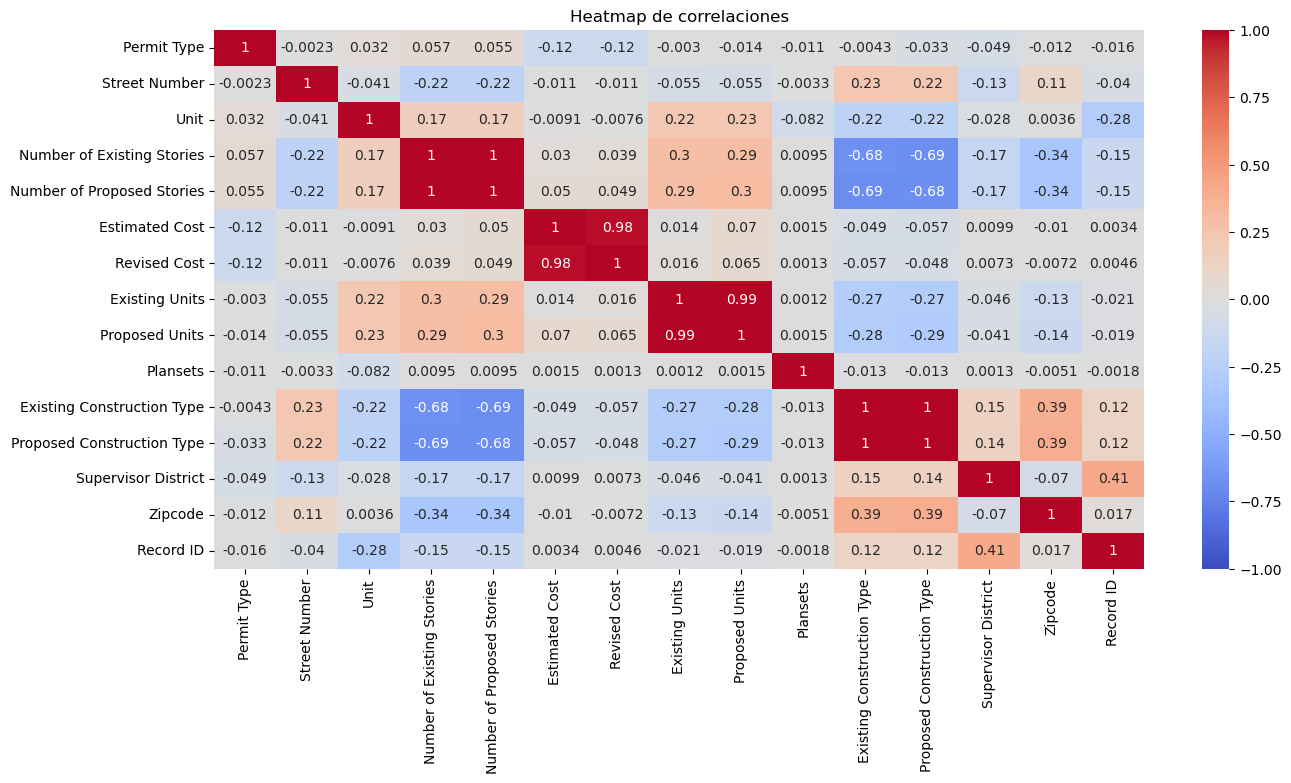

In [10]:
# Correlación entre las distintas columnas

correlation = df_permits_source.corr()


# Heatmap de correlaciones
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap de correlaciones')
plt.show()

In [11]:
# Estadísticos generales del DF
df_permits_source.describe()

,Permit Type,Street Number,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode,Record ID
count,198900.000000,198900.000000,29479.000000,156116.000000,156032.000000,1.608340e+05,1.928340e+05,147362.000000,147989.000000,161591.000000,155534.000000,155738.000000,197183.000000,197184.000000,1.989000e+05
mean,7.522323,1121.728944,78.517182,5.705773,5.745043,1.689554e+05,1.328562e+05,15.666164,16.510950,1.274650,4.072878,4.089529,5.538403,94115.500558,1.162048e+12
std,1.457451,1135.768948,326.981324,8.613455,8.613284,3.630386e+06,3.584903e+06,74.476321,75.220444,22.407345,1.585756,1.578766,2.887041,9.270131,4.918215e+11
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,94102.000000,1.293532e+10
25%,8.000000,235.000000,0.000000,2.000000,2.000000,3.300000e+03,1.000000e+00,1.000000,1.000000,0.000000,3.000000,3.000000,3.000000,94109.000000,1.308567e+12
50%,8.000000,710.000000,0.000000,3.000000,3.000000,1.100000e+04,7.000000e+03,1.000000,2.000000,2.000000,5.000000,5.000000,6.000000,94114.000000,1.371840e+12
75%,8.000000,1700.000000,1.000000,4.000000,4.000000,3.500000e+04,2.870750e+04,4.000000,4.000000,2.000000,5.000000,5.000000,8.000000,94122.000000,1.435000e+12
max,8.000000,8400.000000,6004.000000,78.000000,78.000000,5.379586e+08,7.805000e+08,1907.000000,1911.000000,9000.000000,5.000000,5.000000,11.000000,94158.000000,1.498342e+12


In [12]:
# Visualización de los 5 primeros rows
df_permits_source.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,NaN,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,NaN,NaN,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,0.0,NaN,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [13]:
# Visualización de 3 rows random
df_permits_source.sample(3)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
37320,201401247040,8,otc alterations permit,01/24/2014,7510,033,178,NaN,Amber,Dr,NaN,NaN,replace lower story finishes of a two story ho...,complete,07/23/2014,01/24/2014,01/27/2014,07/23/2014,01/27/2014,NaN,2.0,2.0,NaN,NaN,01/11/2017,150000.0,150000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,8.0,Noe Valley,94131.0,"(37.744281197335404, -122.4451033248689)",1330733226716
94237,201508043255,8,otc alterations permit,08/04/2015,0793,103,400,NaN,Grove,St,NaN,NaN,demo non-structural concrete for plumbing inst...,complete,12/30/2015,08/04/2015,08/10/2015,12/30/2015,08/10/2015,NaN,NaN,5.0,NaN,NaN,08/04/2016,5000.0,9000.0,vacant lot,NaN,apartments,32.0,2.0,NaN,NaN,NaN,1.0,constr type 1,NaN,5.0,Hayes Valley,94102.0,"(37.77799714507359, -122.42356261959036)",1390773489735
18780,201307172005,8,otc alterations permit,07/17/2013,0290,011,1,NaN,Bush,St,NaN,NaN,7th floor fire alarm - add 2 new strobes wall-...,complete,09/17/2013,07/17/2013,07/17/2013,09/17/2013,07/17/2013,NaN,19.0,19.0,NaN,Y,07/12/2014,9000.0,9000.0,office,0.0,office,0.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Financial District/South Beach,94104.0,"(37.790854025012, -122.40010780556314)",131126567091


In [14]:
# Visualización de los 5 últimos rows
df_permits_source.tail()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,NaN,Montgomery,St,NaN,NaN,street space,issued,12/05/2017,12/05/2017,12/05/2017,NaN,12/05/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,NaN,Bush,St,NaN,NaN,fire alarm upgrade ref 201704123852,issued,12/06/2017,12/05/2017,12/06/2017,NaN,12/06/2017,NaN,4.0,4.0,NaN,Y,04/06/2018,5000.0,5000.0,apartments,4.0,apartments,4.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,NaN,NaN,NaN,NaN,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,NaN,Indiana,St,NaN,NaN,street space,issued,12/06/2017,12/06/2017,12/06/2017,NaN,12/06/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,NaN,Sutter,St,NaN,NaN,street space permit,issued,12/06/2017,12/06/2017,12/06/2017,NaN,12/06/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489608233656
198899,M864287,8,otc alterations permit,12/07/2017,0160,006,838,NaN,Pacific,Av,NaN,NaN,street space permit,issued,12/07/2017,12/07/2017,12/07/2017,NaN,12/07/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489796283803


In [15]:
# Nombres de columnas
print(df_permits.keys().to_list()) # = df_permits.column // Con print y .to_list() se visualiza en una sola línea con scroll

['Permit Number', 'Permit Type', 'Permit Type Definition', 'Permit Creation Date', 'Block', 'Lot', 'Street Number', 'Street Number Suffix', 'Street Name', 'Street Suffix', 'Unit', 'Unit Suffix', 'Description', 'Current Status', 'Current Status Date', 'Filed Date', 'Issued Date', 'Completed Date', 'First Construction Document Date', 'Structural Notification', 'Number of Existing Stories', 'Number of Proposed Stories', 'Voluntary Soft-Story Retrofit', 'Fire Only Permit', 'Permit Expiration Date', 'Estimated Cost', 'Revised Cost', 'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units', 'Plansets', 'TIDF Compliance', 'Existing Construction Type', 'Existing Construction Type Description', 'Proposed Construction Type', 'Proposed Construction Type Description', 'Site Permit', 'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode', 'Location', 'Record ID']


### __Modificaciones con Data Cleaning__
En un principio realizamos este apartado con las funcionalidad directa de lo que era necesario. Al realizar el ejercicio de Pipeline, encapsulamos la funcionalidad en una función superior para abstraer la complejidad, facilitar la lectura del pipeline, ofrecer nueva funcionalidad dependiendo de los argumentos enviados y devolver el DF entre cada paso del pipe de forma correcta.

#### __Renombrado con snake_case__

In [16]:
def rename_to_snake_case(df, columns=None):
    """
    Renombra columnas a snake_case. 
    Si no se pasa un listado de columnas, renombra todas las columnas del DF.
    snake_case: Nombre minúsculas, sin espacios externos e internos son _

    Args:
        df (DataFrame): Un DataFrame de Pandas.
        columns (list, opcional): Listado de columnas del DF a convertir

    Return:
        DataFrame con las columnas renombradas
    """
    if columns:
        df = df.rename(columns={col: col.lower().strip().replace(' ', '_') for col in columns})
    else:
        df.columns = df.columns.map(lambda x: x.lower().strip().replace(' ', '_'))

    return df # Necesario para el pipeline

In [17]:
df_permits = rename_to_snake_case(df_permits)
print(df_permits.keys().to_list()) # Con print y .to_list() se visualiza en una sola línea con scroll

['permit_number', 'permit_type', 'permit_type_definition', 'permit_creation_date', 'block', 'lot', 'street_number', 'street_number_suffix', 'street_name', 'street_suffix', 'unit', 'unit_suffix', 'description', 'current_status', 'current_status_date', 'filed_date', 'issued_date', 'completed_date', 'first_construction_document_date', 'structural_notification', 'number_of_existing_stories', 'number_of_proposed_stories', 'voluntary_soft-story_retrofit', 'fire_only_permit', 'permit_expiration_date', 'estimated_cost', 'revised_cost', 'existing_use', 'existing_units', 'proposed_use', 'proposed_units', 'plansets', 'tidf_compliance', 'existing_construction_type', 'existing_construction_type_description', 'proposed_construction_type', 'proposed_construction_type_description', 'site_permit', 'supervisor_district', 'neighborhoods_-_analysis_boundaries', 'zipcode', 'location', 'record_id']


#### __Modificar type de columnas temporales__

In [18]:
def convert_to_datetime(df, columns=None):
    """
    Convierte columnas a datetyme64.
    Si no se envían columnas, se buscan columnas que tengan en el nombre date.

    Args:
        df (DataFrame): Un DataFrame de Pandas.
        columns (list, opcional): Listado de columnas datetype64 del DF a convertir.

    Return:
        DataFrame con las columnas convertidas a datetyme64
    """

    if not columns: # En pipeline extrae los cambios de rename_to_snake_case()
        columns = [col_name for col_name in df.columns if 'date' in col_name]
   
    for col in columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')  # Coerce crea NaTs

    return df

In [19]:
df_permits = convert_to_datetime(df_permits)

#### __Modificar types de columnas que deberían ser int__

In [20]:
def convert_to_int(df, columns):
    """
    Convierte columnas a Int64.

    Args:
        df (DataFrame): Un DataFrame de Pandas.
        columns (list): Listado de columnas Float64 del DF a convertir.

    Return:
        DataFrame con las columnas convertidas a Int64
    """
    # .astype() no permite truncar si hay pérdida de info, por lo que se hace un np.floor()
    df[columns] = np.floor(df[columns]).astype('Int64')

    return df;

In [21]:
to_int_columns = ['zipcode', 'unit', 'plansets', 'existing_construction_type', 'proposed_construction_type', 'proposed_units', 'supervisor_district'] 
df_permits = convert_to_int(df_permits, to_int_columns)

En la columnas `existing_units` existen valores decimales e incluso valores como 0.3, que creemos son incorrectos. Por ejemplo, en la columna que tiene el 0,3 luego tiene en su `proposed_units` un 3. Desde nuestro punto de vista, entendemos que debería tener 0 unidades existentes y se quieren construir 3.

In [22]:
to_int_column= ['existing_units']

df_permits = convert_to_int(df_permits, to_int_column)

#### __Modificar types de columnas que deberían ser bool__

Aquí tratamos aquellas columnas que tienen guardados datos string "Y" y sólo ese dato. Entendemos que estos campos no son obligatorios rellenarlos y que además sólo se rellenan cuando se ha entregado el documento.

Hay que tener cuidado, pues estos cambios influyen mucho en las estadísticas de los valores faltantes posteriores, pues las columnas que pasemos a bool tendrán el 100% de los datos cuando antes no.

In [23]:
to_bool_columns = ['voluntary_soft-story_retrofit', 'structural_notification', 'fire_only_permit', 'site_permit']

# Stack con todas las columnas para contar todos los valores a la vez
y_count = df_permits[to_bool_columns].stack().value_counts(dropna=False)
y_count

Y    31143
dtype: int64

Aquellos campos que no han entregado el documento porque no era necesario, porque todavía no lo hizo o porque no se ha registrado correctamente, le asignamos False, pues en el fondo queremos indicar que ese documento no es accesible.

In [24]:
def convert_to_bool(df, columns):
    """
    Convierte columnas a bool

    Args:
        df (DataFrame): Un DataFrame de Pandas.
        columns (list): Listado de columnas del DF a convertir.

    Return:
        DataFrame con las columnas convertidas a bool
    """
    df[columns] = df[columns].notna() # .notna es el contrario de .isna, devuelve False cuando es 'NaN'

    return df;

In [25]:
df_permits = convert_to_bool(df_permits, to_bool_columns)

En el caso de `'tidf_compliance'`, sólo tiene 2 valores únicos Y y P y sólo tiene 2 valores en total, uno para cada uno. Aunque estas letras, pudieran identificar que tipo de compliance existe, no hemos encontrado información en internet que nos lo asegure.

In [26]:
df_permits['tidf_compliance'].value_counts()

Y    1
P    1
Name: tidf_compliance, dtype: int64

Al no encontrar información y tener tan pocos casos consideramos irrelevante tener que hacer una nueva columna que identifique el posible tipo de tidf. Creemos que es mejor que esta columna directamente identifique si el permiso tiene tidf_compliance o no con un bool.

In [27]:
to_bool_column = ['tidf_compliance']

df_permits = convert_to_bool(df_permits, to_bool_column)

#### __Comprobar valores duplicados__

In [28]:
# Encuentra el número de valores duplicados en el DF y súmalos.
duplicate_numbers = sum(df_permits.duplicated())
print(f"Se han encontrado {duplicate_numbers} valores duplicados")

Se han encontrado 0 valores duplicados


In [29]:
# Function para el pipeline
def delete_duplicated_values(df, columns=None):
    """
    Elimina los duplicados del DF o de columnas específicas.

    Args:
        df (DataFrame): Un DataFrame de Pandas.
        columns (list, opcional): Listado de columnas del DF.

    Return:
        DataFrame con duplicados eliminados
    """
    if columns:
        df = df.drop_duplicates(subset=columns)  
    else:
        df = df.drop_duplicates()

    return df;

#### __Cambiar los NaN a pd.NA__

In [30]:
def convert_to_pdNA(df):
    """
    Convierte NaN en pd.NA sobre todas las columnas del DF excepto datetime64.
    Si es NaT se conserva o la columna sería transformada a object.

    Args:
        df (DataFrame): Un DataFrame de Pandas.

    Return:
        DataFrame con NaNs transformados a pd.NA
    """
    for col in df.columns:
        if df[col].dtype != 'datetime64[ns]':
            df[col] = df[col].fillna(pd.NA)

    return df

In [31]:
df_permits = convert_to_pdNA(df_permits)

---
---

# __EJERCICIO 1__
> __¿Cuál es el volumen de datos faltantes? Tu respuesta debería ser un valor entre 0 y 100 representando un porcentaje__

---
---

## __SOLUCIÓN 1.1__
* El volúmen de datos faltantes está desarrollado por columas, con cifras numéricas y de porcentaje, en la tabla del apartado Desarrollo 1.1

* El total de valores faltantes del DF, **tras el Data Cleaning**, es de 1282570 valores y sus columas tienen de media un	15.07% de valores faltantes, como refleja la tabla.

## __DESARROLLO 1.1__

### __Función para crear tabla de datos de los valores NaN__
Mostramos los valores NaN numéricos y de porcentaje de cada columnas en una tabla para poder tener una información más completa y comprobar pequeñas variaciones. Además, agregamos una row total para ver los valores totales del DF.

Posteriormente, este código lo encapsulamos en la función `calculate_nan_stats()`, ya que se reutiliza en el Desarrollo 1.2, Desarrollo 2.1 y Desarrollo 4.1

In [32]:
pd.set_option('display.max_rows', None)

def calculate_nan_stats(df):
    """
    Muestra las estadísticas (número y porcentaje) de valores NaN por columna de un DF y el total.

    Args:
        df (DataFrame): DataFrame de Pandas.

    Return:
        Retorna un DF con index de columnas del DF origen, 2 columnas (nan_count, nan_percentage) y una row del total.

    """
    nan_count = df.isna().sum() # Numero de nan total por columna  
    nan_percentage = round(df.isna().mean(), 2)*100 # Porcentaje de nan total por columna // .isna = .isnull  // = nan_percentage = df.isna().mean().round(2)*100

    nan_df = pd.concat({'nan_count': nan_count, 'nan_percentage': nan_percentage}, axis=1)


    nan_df.loc['Total'] = [nan_count.sum(), round(nan_percentage.mean(), 2)] # Nueva row con el total de nan_count y la media de nan_percentage

    return nan_df

In [33]:
df_permits_nan_stats = calculate_nan_stats(df_permits)
df_permits_nan_stats

,nan_count,nan_percentage
permit_number,0.0,0.00
permit_type,0.0,0.00
permit_type_definition,0.0,0.00
permit_creation_date,0.0,0.00
block,0.0,0.00
lot,0.0,0.00
street_number,0.0,0.00
street_number_suffix,196684.0,99.00
street_name,0.0,0.00
street_suffix,2768.0,1.00


---
---
> __En el caso concreto de `Completed Date`, tienen sentido todos los valores nulos? Qué pensáis?__
---
---

## __SOLUCIÓN 1.2__
- Enfocándonos en datos existentes sí tiene sentido, pues el número de valores NaT de la columna `completed_date` coincide con valores NaT de la columna `current_status` que no han sido marcados como __completed__. Esto quiere decir que no hay ningún permiso que su estado actual sea completado y le falte una fecha de completado, pero si hay otros permisos con otros estados que, al no haber sido completados, les falta una fecha de completado.
- Por otro lado, la columna `completed_date` tiene un 51% de valores NaT, que se distribuyen entre el resto de rows que no tienen __completed__ como valor en `current_status`y estos valores nulos también pueden ser valores faltantes que no han sido registrados o que no existen.
Los NaT aumentan con el paso del tiempo, revelando un comportamiento natural, pues es normal que los permisos, cuanto más recientes sean, más probabilidad tengan de que todavía no se completasen y por tanto no tengan fecha de completado.

## __DESARROLLO 1.2__

### __Búsqueda de columnas relacionadas__
Al observar las columnas del DF, observamos un campo llamado `current_status`, del que extraemos sus valores más comunes y comprobamos que tiene valores __"complete"__.

In [34]:
df_permits['current_status'].value_counts()

complete       97077
issued         83559
filed          12043
withdrawn       1754
cancelled       1536
expired         1370
approved         733
reinstated       563
suspend          193
revoked           50
plancheck         16
appeal             2
disapproved        2
incomplete         2
Name: current_status, dtype: int64

### __Agrupar stats de una columna en función de los valores de otra__

__Hipótesis__: Todos los campos que tienen `current_status` __"complete"__, tienen también un `completed_date` que no es __NaT__

Comprobamos los de valores NaT de `completed_date` totales y vemos que son 101709, un 51%.

In [35]:
df_permits_nan_stats.loc['completed_date']

nan_count         101709.0
nan_percentage        51.0
Name: completed_date, dtype: float64

Generamos una tabla con los datos de `completed_date` que son NaT y aquellos que no, en función de los valores de `current_status`.

In [36]:
# Agrupa el DF en función de la columna current_status. Toma sólo la columna completed_date y calcula por cada valor de current_status, su cantidad de fechas nulas, valores y el total.
status_date_values = (
      df_permits.groupby('current_status')['completed_date']
      .apply(lambda x: {'NaT': x.isna().sum(), 'isDate': x.count(), 'Total': len(x)})
      .unstack()
    )
# Nueva columna Total para sumar cada columna
status_date_values.loc['Total'] = status_date_values.sum()

status_date_values

,NaT,isDate,Total
current_status,,,
appeal,2,0,2
approved,728,5,733
cancelled,1531,5,1536
complete,0,97077,97077
disapproved,2,0,2
expired,1363,7,1370
filed,12043,0,12043
incomplete,1,1,2
issued,83506,53,83559


Observamos que sólo el valor complete tiene 0 valores NaT.

In [37]:
status_date_values.loc['complete']

NaT           0
isDate    97077
Total     97077
Name: complete, dtype: int64


__Conclusión__ : El número de valores NaT de `completed_date` (101709) coinciden con valores totales NaT de `current_status`que no tienen el status de complete (todos - complete = 101709 - 0), refutando nuestra hipótesis.

### __Análisis NaT en función del tiempo__
__Hipótesis__: La cantidad de NaT de `completed_date` aumenta temporalmente, con mayor cantidad de valores NaT cuanto más reciente es el permiso.

Agrupamos el DF en función del mes de la fecha en `'permit_creation_date'` y realizamos una selección de la columna `'completed_date'`. Calculamos los permisos totales por mes del DF y los NaT totales por mes en `'completed_date'`.

In [38]:
# Agrupa el DF en función del mes de creación "permit_creation_date"
df_permits_monthly = df_permits.groupby(df_permits["permit_creation_date"].dt.to_period("M"))

# Selección de la columna "completed_date" sobre la  agrupación anterior 
df_permits_monthly_completed_date = df_permits_monthly["completed_date"]

# Calcula el número de permisos for mes
monthly_permits = df_permits_monthly.size()

# Calcula el número de NaN en "completed_date" por mes
monthly_nans_by_completed_date = df_permits_monthly_completed_date.apply(lambda x: x.isna().sum().sum())

Generamos un plot para visualizar los dos casos mes a mes. Como se puede apreciar, el número de NaT no parece relacionado a que existan muy pocos permisos inicialmente en la serie y luego entren muchos más, sino que es el tiempo el que más afecta a la fecha de completado, aumentando cuanto más actual es el permiso.

In [39]:
import matplotlib.pyplot as plt

In [106]:
# Crea un layout con 2 rows, 1 columna y un figsize para ambos plots.
# fig, axs = plt.subplots(2, 1, figsize=(10, 7)) # Evita renderizar el gráfico, pues ya hay una imagen.

blue_color = 'royalblue'

# Crea el primer plot asignado a primer row
monthly_permits.plot(kind="bar", ax=axs[0], color=blue_color)
axs[0].set_title("Permisos por mes")
axs[0].set_ylabel("Número de permisos")
axs[0].set_xlabel("Meses")

# Crea el segudno plot asignado al segundo row
monthly_nans_by_completed_date.plot(kind="bar", ax=axs[1], color=blue_color)
axs[1].set_title("NaN Values en 'completed_date' por mes")
axs[1].set_ylabel("NaN Values")
axs[1].set_xlabel("Meses")

# Arregla los espacios entre cada fecha en x
plt.tight_layout()

plt.show()

<Figure size 640x480 with 0 Axes>

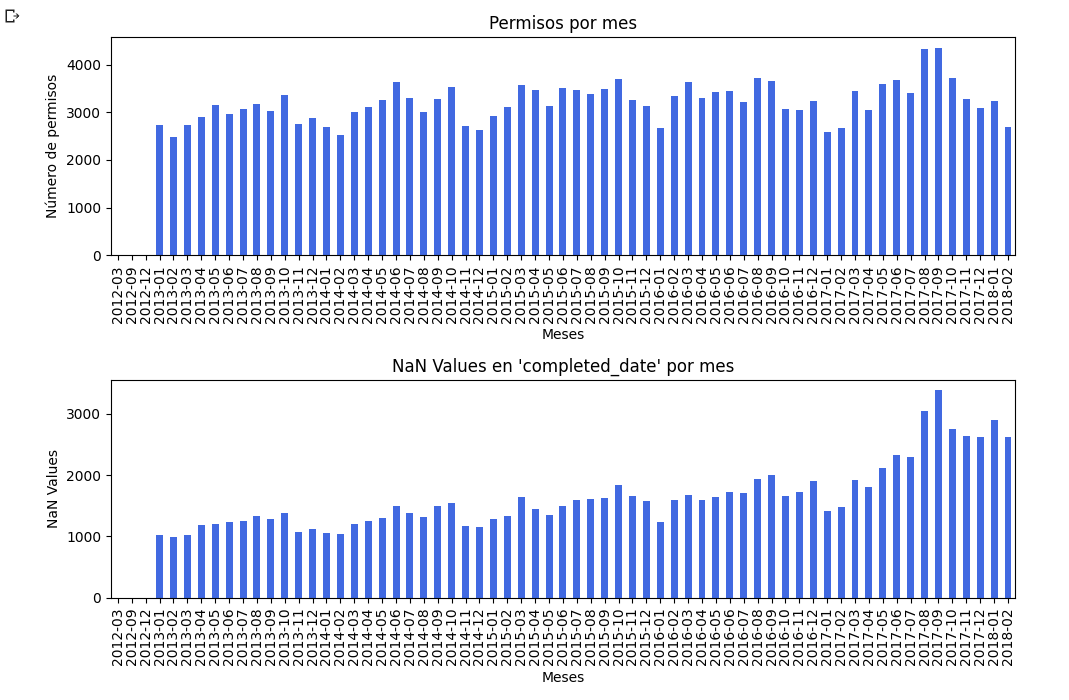

__Conclusión__ : El número de valores NaT de `completed_date` aumenta con el paso del tiempo. Esto se debe a que cuanto más reciente es un permiso, más normal es que todavía no se completase el proyecto y por tanto no tenga esa fecha, refutando nuestra hipótesis.

---
---

# __EJERCICIO 2__
> __Intenta explicar la razón por la que hay datos faltantes. Mirando a las columnas `Street Number Suffix` y `Zipcode` de [San Francisco Building Permits dataset](https://www.kaggle.com/aparnashastry/building-permit-applications-data). Ambas contienen datos faltantes__
- __Cuales, en caso de existir, son los valores faltantes por no existir?__ 
- __Cuales, en caso de existir, son los valores faltantes por no haber sido registrados?__

---
---
 

## __SOLUCIÓN 2.1__
* __Los valores faltantes de `zipcode` por no haber sido registrados__: Son 16 permisos y son aquellos que tienen location (coordenadas) pero no zipcode. No existen registros que tengan zipcode pero no location. Estos datos han sido añadidos en el ejecicio en el Desarrollo 2.1 con la librería geopy.

* __Los valores faltantes de `zipcode` por no existir__: Hay 1700 permisos, que corresponden  con aquellos que no tienen location y no tienen zipcode, por lo que no existe su zipcode en el DF. Sin embargo, esto no quiere decir que no existan en la realidad, solo que sin coordenadas no podemos identificar con exactitud el zipcode como se ve en el Desarrollo 2.2

* __Los valores faltantes de `street_number_suffix` por no existir:__ Tras la investigación, asumimos que es muy probable que la mayor parte de los datos faltantes sean debidos a que las calles no suelen tener un sufijo y por tanto, es la naturaleza de los datos.

* __Los valores faltantes de `street_number_suffix` por no haber sido registrados:__: No tenemos de momento información suficiente como para afirmar que datos son existentes y no han sido registrados. Se debería realizar un análisis más profundo, comparando con otras bases de datos para ver si cada calle está escrita de forma correcta.


## __DESARROLLO 2.1__


### __Zipcode__

#### __Análisis general de los valores__
Al observar los valores únicos de '`zipcode`' y cuantos permisos tiene cada uno, comprobamos que todos los zipcodes registrados son de SF, porque comienzan con 941 y hay 1716 registros que no tienen zipcode asignado.

In [41]:
df_permits['zipcode'].value_counts(dropna=False)

94110    17837
94114    13404
94117    11780
94109    11348
94103    10986
94115    10095
94118     9812
94123     9515
94122     8886
94105     8628
94112     7897
94121     7773
94107     7706
94131     7664
94133     7424
94102     7164
94116     6421
94111     5385
94108     5320
94124     5265
94127     4993
94104     4229
94132     3507
94134     2983
<NA>      1716
94158     1058
94130       81
94129       23
Name: zipcode, dtype: Int64

#### __Búsqueda de columnas relacionadas__
Al observar los valores NaN de zipcode y location (con la tabla del Ejercicio 1), se observa una diferencia de 16 valores. Esto quiere decir que hay 16 permisos que tienen location pero no tienen zipcode.

In [42]:
df_permits_nan_stats.loc[['zipcode', 'location']]

,nan_count,nan_percentage
zipcode,1716.0,1.0
location,1700.0,1.0


#### __Funciones para mostrar valores con máscaras XOR__

__Hipótesis__: Hay 16 permisos que tienen location pero no tienen zipcode, por lo que no se registraron correctamente.

Creamos funciones xor que nos permitan ver y extraer información de pares de columnas cuyos valores uno sea True y otro False. Esto nos permite identificar columnas a investigar, donde la información de una puede ayudar a completar la de otra.

In [43]:
import itertools

In [44]:
def get_xor_mask(df, col1, col2):
    """
    Helper function que genera una máscara XOR para indicar qué filas del DataFrame tienen pares XOR entre dos columnas especificadas.

    Args:
        df (DataFrame): Un DataFrame de Pandas.
        col1 (str): El nombre una columna en el DataFrame.
        col2 (str): El nombre una columna en el DataFrame.

    Returns:
        xor_mask (Series): Una máscara booleana que indica las filas con pares XOR entre las dos columnas.
    """
    mask_col1 = df[col1].isna()
    mask_col2 = df[col2].isna()

    xor_mask = mask_col1 ^ mask_col2  # XOR: True sólo si uno es True y otro False
    return xor_mask


def show_xor_pairs_sum(df, col1=None, col2=None, limit=1500):
    """
    Imprime el número de pares de valores XOR entre dos columnas de un DataFrame, filtrados por un límite máximo de valores.
    Si se envían col1 y col2, muestra todos los pares de valores xor que hay entre esas dos columnas dentro del filtro.
    Si col2 no se envían, muestra todas las combinaciones posible de col1 con cada columnas del DF dentro del filtro
    Si col1 y col 2 no se envían, se muestran todos los pares de combinaciones únicos del DF, filtrados por un límite 

    Args:
        df (DataFrame): Un DataFrame de Pandas.
        col1 (str): El nombre una columna en el DataFrame.
        col2 (str): El nombre una columna en el DataFrame.
        limit (int): El límite de valores a  XOR true a investigar.

    Returns:
        None
    """
    if col1 and col2:
        xor_mask = get_xor_mask(df, col1, col2)
        pairs_count = xor_mask.sum()
        if 0 < pairs_count < limit: # Limita la respuesta en función de un número máximo de parejas de valores xor a estudiar.
                print(f"{col1} y {col2} tienen los siguientes pares de valores XOR : {pairs_count}")
    elif col1 and not col2:
        for i in df.columns: # Generar todas las combinaciones de pares de una columna dada con el resto de columnas del DF
            show_xor_pairs_sum(df, col1, i, limit)   
    else:
        for i, j in itertools.combinations(df.columns, 2): # Generar todas las posibles combinaciones de pares de columnas únicas en el DF
            show_xor_pairs_sum(df, i, j, limit)
            

def get_xor_value_pairs_df(df, col1, col2):
    """
    Extrae las filas con pares de valores XOR True entre dos columnas especificadas como un nuevo DataFrame.

    Args:
        df (DataFrame): Un DataFrame de Pandas.
        col1 (str): El nombre una columna en el DataFrame.
        col2 (str): El nombre una columna en el DataFrame.

    Returns:
        xor_value_pairs (DataFrame): Un nuevo DataFrame que contiene las filas con pares de valores XOR entre las dos columnas.
    """
    xor_mask = get_xor_mask(df, col1, col2)
    xor_value_pairs = df.loc[xor_mask, [col1, col2]]
    return xor_value_pairs

Al ejecutar la función `show_xor_pairs_sum()`, vemos cuantas rows tienen en zipcode y location, un valor que sea True y el otro False.

In [45]:
show_xor_pairs_sum(df_permits, 'zipcode', 'location')

zipcode y location tienen los siguientes pares de valores XOR : 16



Observamos que salen 16 valores, y al mostrarlos con `get_xor_value_pairs_df()` , vemos que todos tienen location pero no zipcode. No sale ningún valor que tenga zipcode pero no location. Por tanto, todos los valores faltantes de zipcode es porque no se han registrado y deberían registrarse porque tienen location.

In [46]:
df_zipcode_xor_location = get_xor_value_pairs_df(df_permits, 'zipcode', 'location')
df_zipcode_xor_location

,zipcode,location
6766,<NA>,"(37.70816952820484, -122.4495824817392)"
18532,<NA>,"(37.708334593230155, -122.45827569112961)"
20954,<NA>,"(37.70816952820484, -122.4495824817392)"
24780,<NA>,"(37.70817427088525, -122.46354383455132)"
60090,<NA>,"(37.70817427088525, -122.46354383455132)"
62943,<NA>,"(37.708226716717746, -122.43716527609189)"
73498,<NA>,"(37.708204600085985, -122.4630562449027)"
92845,<NA>,"(37.80840337746089, -122.41669645885156)"
105273,<NA>,"(37.708219005746415, -122.46360939461846)"
106465,<NA>,"(37.708219005746415, -122.46360939461846)"


#### __Función para actualizar zipcode en función de location__

Estos valores se pueden obtener con librerías externas como geopy, que ofrecen diversos datos dadas las coordenadas, entre ellos el zipcode.

Creamos una función que pasándole un dataframe, los índices que debe actualizar (extraídos de la máscara xor para que no tenga que iterar por todo el DF) y las columnas de zipcode y location, actualiza los zipcodes.

In [48]:
# Guarda la librería en el Kernel actual, evitando desconexiones entre el Jupyter kernel y el Shell
import sys
!{sys.executable} -m pip install geopy

Defaulting to user installation because normal site-packages is not writeable


In [49]:
from geopy.geocoders import Nominatim

In [50]:
# Para evitar hacer requests redundantes a la API y que nos bloqueen, creamos un diccionario cache
cache_zipcode_from_location = {}

In [51]:
def zipcode_from_location(df, indexes=None, zipcode_col='zipcode', location_col='location'):

    """
    Actualiza el zipcode de un DF a partir de las coordenadas de localización.
    Si los índices no se proporcionan, los busca a partir de pares de valores xor.

    Args:
        df (DataFrame): Un DataFrame de Pandas
        indexes (list, opcional): Listado de índices zipcode a cambiar.
        zipcode_col (str): La columna zipcode del DF
        location_col (str): La columna location del DF

    Returns:
        DataFrame actualizado para pipeline
    """
    # Índices de los zipcodes que se encuentran pares de valroes xor con location
    if not indexes:
            df_zipcode_xor_location = get_xor_value_pairs_df(df, zipcode_col, location_col)
            indexes = df_zipcode_xor_location.index.tolist()

    # Crea una instancia del Nominatim object para hacer reverse geocoding
    geolocator = Nominatim(user_agent="geolocator_user_01")

    for index in indexes:
        location = df.at[index, location_col]
        
        if pd.notnull(location): #
 
          latitude, longitude = map(float, location.strip('()').split(', '))

          # Comprueba si el resultado está ya en la chache
          if location in cache_zipcode_from_location:
              zipcode = cache_zipcode_from_location[location]
              df.at[index, zipcode_col] = zipcode
          else:
              # Location object con los detalles de la dirección en función de las coordenadas.
              location_obj = geolocator.reverse((latitude, longitude))

              # Obtener el postcode de la dirección
              zipcode = location_obj.raw['address'].get('postcode', '')

              # Cache el resultado para futuras ejecuciones
              cache_zipcode_from_location[location] = int(zipcode)

              df.at[index, zipcode_col] = int(zipcode)

    return df # Necesario para el pipeline

Al comprobar los índices actualizados del DF, se observan las 16 columnas actualizadas.

In [52]:
zipcode_indexes = df_zipcode_xor_location.index.tolist()

zipcode_from_location(df_permits)
df_permits.loc[zipcode_indexes, ['zipcode', 'location']]


,zipcode,location
6766,94112,"(37.70816952820484, -122.4495824817392)"
18532,94112,"(37.708334593230155, -122.45827569112961)"
20954,94112,"(37.70816952820484, -122.4495824817392)"
24780,94014,"(37.70817427088525, -122.46354383455132)"
60090,94014,"(37.70817427088525, -122.46354383455132)"
62943,94112,"(37.708226716717746, -122.43716527609189)"
73498,94014,"(37.708204600085985, -122.4630562449027)"
92845,94133,"(37.80840337746089, -122.41669645885156)"
105273,94014,"(37.708219005746415, -122.46360939461846)"
106465,94014,"(37.708219005746415, -122.46360939461846)"


Sin embargo, con esta operación apreciamos dos zipcodes, proporcionados por geopy, que no son de SF:
* __94014__: Zipcode de Dali City, San Mateo. Se encuentra justo debajo de SF y las coordenadas son correctas. Pueden ser outliers o puede que el permiso deba realizarse en SF. Han sido eliminados posteriormente en Desarrollo 5.1.

* __90214__: Zipcode de Los Angeles, California. En este caso el problema son las coordenadas, pues (37.80839250874325, -122.4237836956073) está en el mar. Tras ver las coordenadas en Google Maps, es una zona acotada de mar que pertence a San Francisco Maritime National Historical Park y que tiene un zipcode 94109, por lo que se lo modificamos

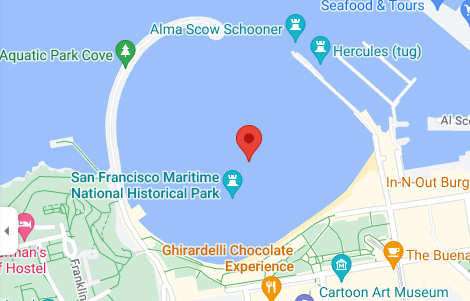

In [53]:
df_permits.loc[197441, 'zipcode'] = 94109

### __Street Number Suffix__

#### __Análisis general de los valores__
Al observar los valores únicos de '`steet_number_suffix`' y cuantos permisos tiene cada uno, comprobamos valores como 1/2 que son raros. Sin embargo, al comprobarlo en Google Maps, encontramos que las calles de esas rows son correctas como 1/2 Henry St, San Francisco. Los datos por tanto, son correctos en general y habría que realizar un análisis más específico, calle a calle, para comprobar si hay errores específicos en ellas.

In [54]:
df_permits['street_number_suffix'].value_counts(dropna=False)

<NA>    196684
A         1501
B          291
V          228
C           56
E           28
F           24
G           12
D           11
K           11
H           11
R           10
L           10
J            9
I            7
P            3
N            2
0            1
½            1
Name: street_number_suffix, dtype: int64

#### __Búsqueda de columnas relacionadas__

Este caso es diferente, pues la columna `'street_number_suffix'` tiene un 99% de valores nan. Además, no tiene relaciones xor de pocos elementos con alguna columna, sólo con `'unit_suffix'` tiene 4115 valores de parejas xor. 

In [55]:
show_xor_pairs_sum(df_permits, col1='street_number_suffix', limit=10000)

street_number_suffix y unit_suffix tienen los siguientes pares de valores XOR : 4115


In [56]:
df_permits_nan_stats.loc[['street_number_suffix', 'unit_suffix']]

,nan_count,nan_percentage
street_number_suffix,196684.0,99.0
unit_suffix,196939.0,99.0


In [57]:
suffix_per_date = df_permits.groupby(df_permits['street_number_suffix'])['unit_suffix'].value_counts(dropna=False).unstack()
suffix_per_date.loc['Total'] = suffix_per_date.sum()
suffix_per_date

unit_suffix,NaN,1ST FLOOR,3/F FRONT,A,BLDG 3E,FRONT UNIT,H,LEVEL 4,LOWER,LOWER UNIT,MIDDLE,REAR,REAR BLDG,RESIDENTIA,TENTATIVE,UPPER,UTILITY
street_number_suffix,,,,,,,,,,,,,,,,,
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A,1482.0,NaN,1.0,1.0,NaN,4.0,NaN,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0
B,283.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,NaN
C,55.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,10.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,23.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Al ver estos datos y la tabla, la única relación que hay, es que parece más común encontrar en el `street_number_suffix` __A__ , algún tipo de `unit_suffix`. Sin embargo, esto no nos permite identificar motivos claros de que exista una falta de datos correlacionada.

Concluimos que la falta de datos, es debido a que no existen, pues no todas las calles tienen que tener un sufijo y lo más normal es que no lo tengan. En cuanto a los datos faltantes por no haber sido incluídos, se podría tratar de comparar con otra base de datos y ver si cada calle está escrita de forma correcta.



---
---
> __Realiza este mismo ejercicio con el resto de columnas con el objetivo de estudiar y conocer los datos en detalle, además esto te puede ayudar a detectar dependencias entre columnas y ser capaz de contar mejor la historia que cuentan los datos.__

---
---

## __SOLUCIÓN 2.2__

- __Análisis anual__: Muestra que sólo hay 22 permisos en 2012 y que la cantidad de permisos mensual y los nans mensuales tienen una correlación de 0.96. Esto indica que en general, los NaN entran dentro del DF de una forma constante y no debido a un error durante un tiempo o campo determinado.


- __Columnas que pueden explorarse__: Estas columnas pueden tener relación directa entre ellas y la información se puede completar conociendo los valores en otros campos o sacados de información accesible de la realidad. `'street_suffix'` , `'supervisor_district'` , `'neighborhoods_-_analysis_boundaries'` , `'zipcode'` , y `'location'`

- __Columnas con todos los valores__: Estas columnas contienen información completa y por tanto, no pueden mejorarse sin alguien de negocio que encuentre datos mal escritos.`'permit_number'` , `'permit_type'` , `'permit_type_definition'` , `'permit_creation_date'` , `'block'` , `'lot'` , `'street_number'` , `'description'` , `'street_name'` , `'current_status'` ,`'current_status_date'` , `'filed_date'` , `'structural_notification'` , `'voluntary_soft-story_retrofit'` , `'fire_only_permit'` , `'tidf_compliance'`, `'site_permit'` y `'record_id'`. 

- __Columnas con valores descriptivos no estrictos__: Estas columnas no pueden ser resueltas con relaciones con otras, pues tienen muchos valores unicos variados. `'existing_use'` y `'proposed_use'`. 

- __Columnas con muchos valores NaN__: Estas columnas representan campos que normalmente no tienen valor, haciendo muy difícil, una comprobación para ver si sus valores son correctos o faltantes. `'street_number_suffix'` , `'unit'` y `'unit_suffix'`.

- __Columnas en parejas de diferentes estados__: Estas columnas se encuentran en parejas y una define un estado inicial y la otra recoge si el estado siguiente se ha realizado. `'issued_date'` y `'completed_date'` ,`'estimated_costs'` y `'revised_cost'` 

- __Columnas de fechas con valores NaT__: Estas columnas pueden tener representar estados que todavía no se han cumplido o se han cumplido pero son muy variados, haciendo dificil encontrar un resultado preciso con respecto a otras columnas. Se pueden realizar interpolaciones y ver campos parecidos, pero no son resultados exactos. `'first_construction_document_date'` , `'permit_expiration_date'` y `'proposed_use'`.

- __Columnas con relación NaN precisa y valores muy parecidos__: Estas columnas tienen en general una relación muy alta de valores iguales en ambas, pero aquellos que no coinciden, no se puede decir que sean un fallo sin alguien de negocio que explique en detalle el DF o puede ser una falta de información normal. `'number_of_existing_stories'`, `'number_of_proposed_stories'`, `'existing_units'`, `'proposed_units'`, `'existing_construction_type'`, `'existing_construction_type_description'`, `'proposed_construction_type'`, `'proposed_construction_type_description'`,.

- __Columnas numéricas sin relación clara__: Estas columnas definen algún valor pero no parecen tener una relación clara de información con otra columna, o si aparentemente la tienen, no se puede asegurar que el dato falte por fallo, sino más bien porque no existe de momento, hasta que alguien de negocio lo valide. `'plansets'`

## __DESARROLLO 2.2__

### __Análisis anual__
Para explicar mejor los datos, decidimos hacer un visionado por mes de los datos de los permisos y los NaN.
Encontramos que el DF empieza desde 2012 con muy pocos valores y en 2018 no termina el año. Se podría eliminar los 22 datos de 2012 si vemos que no son muy representativos.

In [58]:
# Ordenamos el número de permisos por orden descendente en función
df_permits['permit_creation_date'].dt.year.value_counts().sort_index(ascending=False)

2018     5937
2017    41156
2016    39721
2015    40150
2014    36686
2013    35228
2012       22
Name: permit_creation_date, dtype: int64

Realizamos un conteo de cuantos permisos hay por mes y cuantos NaN aparecen cada mes en total.

In [59]:
# Agrupa el DF en función del mes de creación "permit_creation_date"
df_permits_monthly = df_permits.groupby(df_permits["permit_creation_date"].dt.to_period("M"))

# Calcula el número de permisos for mes
monthly_permits = df_permits_monthly.size()

# Calcula el número de NaNs for mes
monthly_nans = df_permits_monthly.apply(lambda x: x.isna().sum().sum())

La correlación entre ambos es cercana a 1. Lo interpretamos como que la mayoría de datos que se aportan al DF son datos faltantes por no existir, pues a mayor número de permisos inscritos, el número de datos faltantes sigue la misma distribución, aumentando también y viceversa.

In [60]:
# Create a new DataFrame with permits and NaNs data per month
df_combined = pd.DataFrame({"Permits": monthly_permits, "NaNs": monthly_nans })

# Calculate the correlation between permits and NaNs
correlation = df_combined["Permits"].corr(df_combined["NaNs"])
print(f"La correlación entre el número de Permisos por mes y los Nans por mes es: {correlation}")

La correlación entre el número de Permisos por mes y los Nans por mes es: 0.9601658472322647


In [105]:
# Crea un layout con 2 rows, 1 columna y un figsize para ambos plots.
# fig, axs = plt.subplots(2, 1, figsize=(10, 7)) # Evita renderizar el gráfico, pues ya hay una imagen.

blue_color = 'royalblue'

# Crea el primer plot asignado a primer row
monthly_permits.plot(kind="bar", ax=axs[0], color=blue_color)
axs[0].set_title("Permisos por mes")
axs[0].set_ylabel("Número de permisos")
axs[0].set_xlabel("Meses")

# Crea el segudno plot asignado al segundo row
monthly_nans.plot(kind="bar", ax=axs[1], color=blue_color)
axs[1].set_title("NaN Values por mes")
axs[1].set_ylabel("NaN Values")
axs[1].set_xlabel("Meses")

# Arregla los espacios entre cada fecha en x
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

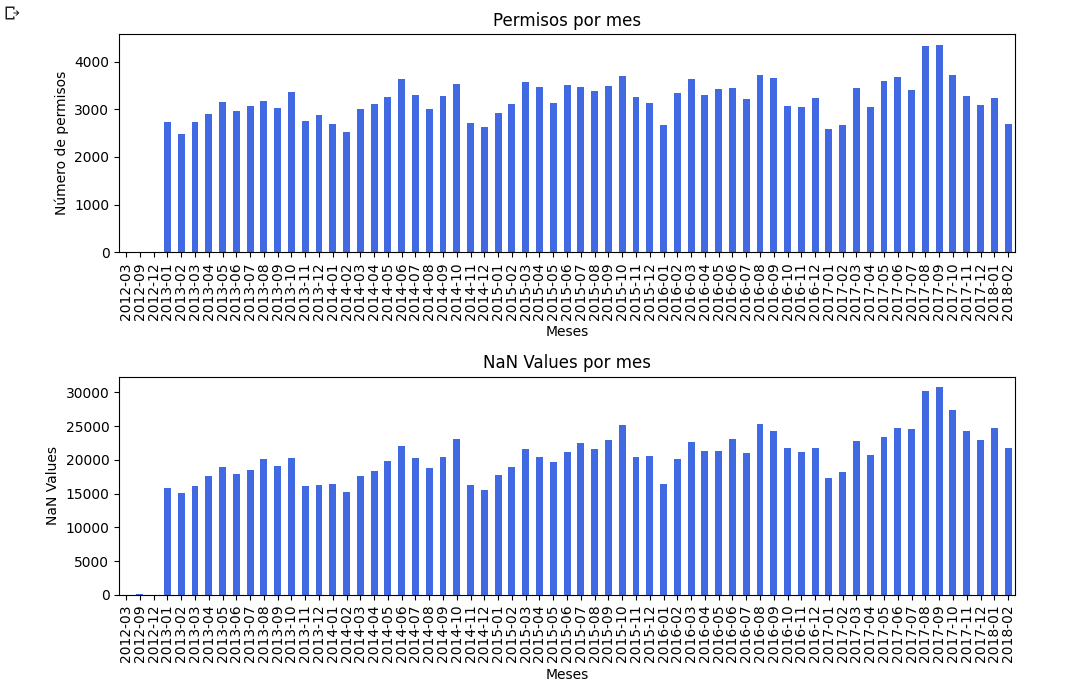

### __Análisis de pares de columnas__

Utilizando las funciones xor que hemos creado, podemos ver nuevos pares de columnas que contengan valores True y False, de los cuales podamos completar la información de una columna conociendo la información de otra por su dependencia.

Traremos de analizar pares de columnas con valores xor entre ellas y que no superen las 1500 coincidencias. Como los NaNs en general tienen una correlación con el número de permisos por mes, consideramos que la falta de datos por no haber sido registrados son casos donde falten pocos datos y en aquellas columnas que marcamos en Solución 2.2 como __columnas que pueden mejorarse__.

In [62]:
show_xor_pairs_sum(df_permits, limit=1500)

permit_number y description tienen los siguientes pares de valores XOR : 290
permit_type y description tienen los siguientes pares de valores XOR : 290
permit_type_definition y description tienen los siguientes pares de valores XOR : 290
permit_creation_date y description tienen los siguientes pares de valores XOR : 290
block y description tienen los siguientes pares de valores XOR : 290
lot y description tienen los siguientes pares de valores XOR : 290
street_number y description tienen los siguientes pares de valores XOR : 290
street_name y description tienen los siguientes pares de valores XOR : 290
description y current_status tienen los siguientes pares de valores XOR : 290
description y current_status_date tienen los siguientes pares de valores XOR : 290
description y filed_date tienen los siguientes pares de valores XOR : 290
description y structural_notification tienen los siguientes pares de valores XOR : 290
description y voluntary_soft-story_retrofit tienen los siguientes pa

#### __Exploración de districts y neighborhoods a partir de zipcode__
De entre los pares de columnas, encontramos 2 casos `'supervisor_district'` y `'neighborhoods_-_analysis_boundaries'` que pueden sacarse a través del zipcode que está resuelto para ese mismo valor en otra row.

In [63]:
show_xor_pairs_sum(df_permits, col1='zipcode', limit=1500)

zipcode y supervisor_district tienen los siguientes pares de valores XOR : 17
zipcode y neighborhoods_-_analysis_boundaries tienen los siguientes pares de valores XOR : 25


Sin embargo, al analizar los `'zipcodes'` con ambas columnas, encontramos que no tienen una relación 1:1, sino que es múltiple y por lo tanto no podemos definir con exactitud que valor deben tener `'supervisor_district'` y `'neighborhoods_-_analysis_boundaries'`.

In [64]:
district_zipcodes = df_permits.groupby('zipcode')['neighborhoods_-_analysis_boundaries'].unique()
district_zipcodes

zipcode
94014                                               [<NA>]
94102    [Tenderloin, Hayes Valley, Financial District/...
94103    [Mission, South of Market, Mission Bay, Financ...
94104                     [Financial District/South Beach]
94105                     [Financial District/South Beach]
94107    [Potrero Hill, Mission Bay, Financial District...
94108    [Chinatown, Financial District/South Beach, No...
94109    [Russian Hill, Nob Hill, Pacific Heights, West...
94110    [Mission, Bernal Heights, Noe Valley, Potrero ...
94111    [Chinatown, Financial District/South Beach, No...
94112    [Outer Mission, Excelsior, Oceanview/Merced/In...
94114    [Castro/Upper Market, Noe Valley, Twin Peaks, ...
94115    [Pacific Heights, Western Addition, Lone Mount...
94116    [West of Twin Peaks, Sunset/Parkside, Inner Su...
94117    [Lone Mountain/USF, Haight Ashbury, Hayes Vall...
94118    [Inner Richmond, Outer Richmond, Presidio Heig...
94121    [Outer Richmond, Lincoln Park, Seacliff

In [65]:
neighborhoods_zipcodes = df_permits.groupby('zipcode')['supervisor_district'].unique()
neighborhoods_zipcodes

zipcode
94014                 [<NA>]
94102           [3, 6, 5, 8]
94103          [8, 6, 9, 10]
94104                    [3]
94105                 [6, 3]
94107                [10, 6]
94108                    [3]
94109     [3, 2, 5, 6, <NA>]
94110             [9, 8, 10]
94111                    [3]
94112    [11, 8, 7, 9, <NA>]
94114              [8, 7, 5]
94115                 [2, 5]
94116                 [7, 4]
94117           [5, 8, 1, 7]
94118              [1, 2, 5]
94121                 [1, 2]
94122           [5, 4, 7, 1]
94123                    [2]
94124                [10, 9]
94127                [7, 11]
94129                    [2]
94130                    [6]
94131              [8, 7, 5]
94132       [7, 11, 4, <NA>]
94133           [3, 2, <NA>]
94134            [9, 10, 11]
94158                    [6]
Name: supervisor_district, dtype: object

#### __Exploración de districts y neighborhoods entre sí__
En el caso de `'supervisor_district'` y `'neighborhoods_-_analysis_boundaries'`, los neighborhoods sólo pueden estar en un sólo distrito, sin embargo, los pares de valores que existen sólo les falta el neighborhood, el cual puede ser múltiple por cada district, impidiendo que podamos completar los datos con exactitud.

In [66]:
get_xor_value_pairs_df(df_permits, 'supervisor_district', 'neighborhoods_-_analysis_boundaries')

,supervisor_district,neighborhoods_-_analysis_boundaries
73628,11,<NA>
95269,11,<NA>
109210,11,<NA>
111291,7,<NA>
153084,7,<NA>
162451,7,<NA>
175513,7,<NA>
183375,11,<NA>


---
---

# __EJERCICIO 3__
> __Eliminando valores faltantes, filas.
Si borramos todas las filas de `sf_permits` con datos faltantes, cuántas nos quedan? Crees que es una aproximación válida?__

---
---

## __SOLUCIÓN 3.1__
* No es un procedimiento correcto porque prácticamente elimina todas las rows, ya que en la mayoría tienen alguna columna con un valor NaN.

## __DESARROLLO 3.1__

### __Eliminación de rows con dropna__

In [67]:
df_permits_drop = df_permits.copy()

# Elimina las rows con nans
df_permits_drop = df_permits_drop.dropna()

df_permits_drop

,permit_number,permit_type,permit_type_definition,permit_creation_date,block,lot,street_number,street_number_suffix,street_name,street_suffix,unit,unit_suffix,description,current_status,current_status_date,filed_date,issued_date,completed_date,first_construction_document_date,structural_notification,number_of_existing_stories,number_of_proposed_stories,voluntary_soft-story_retrofit,fire_only_permit,permit_expiration_date,estimated_cost,revised_cost,existing_use,existing_units,proposed_use,proposed_units,plansets,tidf_compliance,existing_construction_type,existing_construction_type_description,proposed_construction_type,proposed_construction_type_description,site_permit,supervisor_district,neighborhoods_-_analysis_boundaries,zipcode,location,record_id
181057,201709056905,8,otc alterations permit,2017-09-05,3558,076,3446,A,16th,St,3446,A,perform repairs as per lingruen assc. termite ...,complete,2017-09-13,2017-09-05,2017-09-05,2017-09-13,2017-09-05,False,3.0,3.0,False,False,2018-01-05,2760.0,2760.0,apartments,3,apartments,3,0,False,5,wood frame (5),5,wood frame (5),False,8,Castro/Upper Market,94114,"(37.764631382981456, -122.42964139243725)",1477480158554


---
---
> __Eliminando valores faltantes, columnas.Ahora intentemos eliminar todas las columnas con valores vacíos.__
- __Crea un nuevo DataFrame llamado `sf_permits_with_na_dropped` que tenga todas las columnas con valores vacíos eliminadas.__
- __¿Cuántas columnas se han eliminado del DataFrame original `sf_permits`? Utiliza este número para establecer el valor de la variable `dropped_columns`.__

---
---

## __SOLUCIÓN 3.2__
* De 43 columnas, sólo quedan 17 columnas con todos los valores y se han eliminado 26.

## __DESARROLLO 3.2__

### __Eliminación de columnas con dropna__

In [68]:
sf_permits_with_na_dropped = df_permits.copy()

# Elimina las columnas con nans
sf_permits_with_na_dropped = df_permits.dropna(axis='columns')

sf_permits_with_na_dropped.head(5)

,permit_number,permit_type,permit_type_definition,permit_creation_date,block,lot,street_number,street_name,current_status,current_status_date,filed_date,structural_notification,voluntary_soft-story_retrofit,fire_only_permit,tidf_compliance,site_permit,record_id
0,201505065519,4,sign - erect,2015-05-06,0326,023,140,Ellis,expired,2017-12-21,2015-05-06,False,False,False,False,False,1380611233945
1,201604195146,4,sign - erect,2016-04-19,0306,007,440,Geary,issued,2017-08-03,2016-04-19,False,False,False,False,False,1420164406718
2,201605278609,3,additions alterations or repairs,2016-05-27,0595,203,1647,Pacific,withdrawn,2017-09-26,2016-05-27,False,False,False,False,False,1424856504716
3,201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,Pacific,complete,2017-07-24,2016-11-07,False,False,False,False,False,1443574295566
4,201611283529,6,demolitions,2016-11-28,0342,001,950,Market,issued,2017-12-01,2016-11-28,False,False,False,False,False,144548169992


In [69]:
# Muestra los datos de columnas previos y tras el dropna
original_columns = df_permits.shape[1]
value_columns = sf_permits_with_na_dropped.shape[1]
dropped_columns = original_columns - value_columns

print(f'''
    Columnas originales: {original_columns}
    Columnas eliminadas con algún valor faltante: {dropped_columns}
    Columnas con todos los valores: {value_columns}''')


    Columnas originales: 43
    Columnas eliminadas con algún valor faltante: 26
    Columnas con todos los valores: 17


### __Función de eliminado de series para pipeline__
En el último ejercicio es necesario crear un pipeline, por lo que hemos creado una función que pueda retornar el DF del pipeline y controle todos los drops que necesitamos a través de parámetros.

In [70]:
def drop_series(df, axis, columns=None, index=None, value=None):
    """
    Elimina series de un DF para poder utilizarse en un pipeline
    
    Parameters:
        df (DataFrame): Un DataFrame de Pandas
        axis (str o int): Selecciona el modo de borrar: 'row'/0  'column'/1
        columns (str): Una columna o varias de un DF
        index (int): Un índice de una row de un DF
        value (srt o int): Un valor específico de un campo
    
    Returns:
        DataFrame con las columnas o filas eliminadas..
    """
    if axis == 'row' or axis == 0:
        if columns and value: # Elimina una row dado un value y una columna específica
            if df[columns].dtype == 'datetime64[ns]': # Si la columna es datetime64, busca valor como año
                df = df.drop(df[df[columns].dt.year == value].index)
            else:
                df = df.drop(df[df[columns] == value].index)
        elif index: # Elimina varias rows por su index
            df = df.drop(index=index)
        else: # Elimina todas las rows.
            df = df.drop(df.index, inplace=False)
    elif axis == 'column' or axis == 1:
        if index and value: # Elimina una columna dado un value en un index específico
            df = df.drop(df.columns[df.loc[index] == value], axis=1)
        elif columns: # Elimina una serie de columnas
            df = df.drop(columns, axis=1)
        else: # Elimina todas las columnas
            df = df.drop(df.columns, axis=1)
    return df

---
---

# __EJERCICIO 4__
> __Rellenando los datos faltantes de manera automática.
Intenta reemplazar todos los NaN en los datos de `sf_permits` con el que viene directamente después y luego reemplazar cualquier NaN restante con 0. Establezca el resultado en un nuevo DataFrame `sf_permits_with_na_imputed`.__

---
---

## __SOLUCIÓN 4.1__
* Todos los datos faltantes son sustituidos y tenemos un 0% de NaNs en el DF.
* El problema es que puede causar ruido en algunos campos. Por ejemplo, si una location toma los valores del anterior, puede ocurrir que le ponga unas coordenadas que nada tienen que ver con la zona de verdad que debe tener.

## __DESARROLLO 4.1__

### __Rellenado de datos con fillna bfill y fillna 0__
Inicialmente realizamos lo que marcaba el ejercicio y al llegar al Pipeline, encapsulamos la función y le dimos otras funcionalidades como poder rellenar con la media.

In [71]:
# Remplazamos datos con método bfill (el inmediato de después)
def fill_na_values(df, method='bfill'):
    # Para el pipeline añadimos la posibilidad de hacer un fill con mean
    if method == 'mean':
        mean_values = df.mean()
        df = df.fillna(mean_values)
    else:
        df = df.fillna(method=method, axis=0).fillna(0)
    return df


sf_permits_with_na_imputed = fill_na_values(df_permits, method='bfill')
calculate_nan_stats(sf_permits_with_na_imputed)

,nan_count,nan_percentage
permit_number,0.0,0.0
permit_type,0.0,0.0
permit_type_definition,0.0,0.0
permit_creation_date,0.0,0.0
block,0.0,0.0
lot,0.0,0.0
street_number,0.0,0.0
street_number_suffix,0.0,0.0
street_name,0.0,0.0
street_suffix,0.0,0.0


---
---

# __EJERCICIO 5__
> __Existen casos en los que encontramos valores atípicos dentro de nuestros datos. Tal y como conocemos, estos valores no tienen por qué suponer una barrera, sino una oportunidad. Revisa la naturaleza de las columnas y determina si existen casos en los que tengamos valores atípicos. De ser así, define la estrategia que consideres más adecuada para tratarlos.__

---
---

## __SOLUCIÓN 5.1__
* Después de observar las columnas `'estimated_cost'` , `'existing_units'` , `'number_of_existing_stories'` , `'revised_cost'` , `'proposed_units'` , `'number_of_proposed_stories'` y sus posibles outliers de forma específica, no se ven claros motivos por los que no puedan existir estos valores como se observa en el análisis específico.

* Mostramos visualizaciones scatter de plot a través de IQR con cada una de las posibilidades y si en un futuro queremos realizar un modelo ML para predecir ciertos datos, podemos considerar eliminar outliers que no aporten al caso específico a entrenar.

* Sin embargo, conocemos algunos outliers en '`zipcode`' que se generaron al sacar los zipcodes de locations con geopy, revelando que había localizaciones que no eran de SF sino de San Mateo County. Estas rows se han eliminado.

## __DESARROLLO 5.1__

### __Eliminación de outliers en zipcode__

Al generar los datos de zipcode faltantes con las coordenadas de location, Desarrollo 2.1 con geopy, descubrimos una serie de rows que tienen un zipcode de Dali City, San Mateo debido a sus coordenadas. Decidimos eliminarlas por no ser datos de la ciudad de SF.

In [72]:
df_permits_cleaned = sf_permits_with_na_imputed.copy()
df_permits_cleaned = df_permits_cleaned.drop(df_permits_cleaned[df_permits_cleaned['zipcode'] == 94014].index)

### __Selección de columnas y estadísticos__
Al analizar estas columnas de interés para ver outliers, ya que están relacionadas con el precio, comprobamos que son parecidas. `'estimated_cost', 'existing_units', 'number_of_existing_stories'` son datos previos iniciales y `'revised_cost', 'proposed_units', 'number_of_proposed_stories'` son datos modificados posteriormente, con correcciones.

Decidimos evaluar el último grupo, pues son los valores que más se aproximan al dato real, pudiendo quitar las 3 columnas iniciales que son datos previos sin las actualizaciones posteriores.

In [73]:
subset_sf_permits = df_permits_cleaned[['estimated_cost', 'existing_units', 'number_of_existing_stories', 'revised_cost', 'proposed_units', 'number_of_proposed_stories']]
subset_sf_permits.describe()

,estimated_cost,existing_units,number_of_existing_stories,revised_cost,proposed_units,number_of_proposed_stories
count,1.988940e+05,198894.0,198894.000000,1.988940e+05,198894.0,198894.000000
mean,1.773168e+05,15.954986,5.674704,1.343941e+05,16.825369,5.723604
std,4.158292e+06,75.974682,8.559584,3.619506e+06,76.449645,8.571089
min,0.000000e+00,0.0,0.000000,0.000000e+00,0.0,0.000000
25%,3.300000e+03,1.0,2.000000,1.000000e+00,1.0,2.000000
50%,1.100000e+04,1.0,3.000000,7.000000e+03,1.0,3.000000
75%,3.500000e+04,4.0,4.000000,2.850000e+04,4.0,4.000000
max,5.379586e+08,1907.0,78.000000,7.805000e+08,1911.0,78.000000


### __Visualización 1D de outliers con box plot__

Al visualizar las columnas de forma individual, vemos muchos datos que podrían considerarse outliers, pues  están fuera muy lejos de la media (linea verde), de los atípicos leves (línea naranja) y de los atípicos graves (línea roja).


In [74]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [80]:
x_values = ['revised_cost', 'proposed_units', 'number_of_proposed_stories']

# Crea una serie de plots con 1 row y tantas columnas como tenga el listado
fig = make_subplots(1, len(x_values))

# Crea un plot por columna y el título debajo por columna
for i, column in enumerate(x_values):

    # Box plot
    fig.add_trace(
        go.Box(y=df_permits_cleaned[column], name=' ', marker=dict(color='SlateGray')),
        row=1, col=i+1,) # Position: Row 1, columna según iteración
    fig.update_xaxes(title_text=column, col=i+1) # Agrega un título en el eje x
    
    # Línea de media
    mean = df_permits_cleaned[column].mean()
    fig.add_shape(
        type='line',
        x0=-1, x1=1, # Width: De izquierda a derecha
        y0=mean, y1=mean, # Height: Media
        line=dict(color='LimeGreen', width=3, dash='dash'), # Styles
        row=1, col=i+1 # Position: Plot iterado
    )

    # Línea de atípicos leves
    low_outliers = mean + 1.5 * df_permits_cleaned[column].std()
    fig.add_shape(
        type='line',
        x0=-1, x1=1, # Width: De izquierda a derecha
        y0=low_outliers, y1=low_outliers, # Height: Atipicos leves
        line=dict(color='Orange', width=3, dash='dash'), # Styles
        row=1, col=i+1 # Position: Plot iterado
    )
     
    # Línea de atípicos graves
    high_outliers = mean + 3 * df_permits_cleaned[column].std()
    fig.add_shape(
        type='line',
        x0=-1, x1=1, # Width: De izquierda a derecha
        y0=high_outliers, y1=high_outliers, # Height: Atipicos leves
        line=dict(color='Crimson', width=3, dash='dash'), # Styles
        row=1, col=i+1 # Position: Plot iterado
    )

In [ ]:
# Establece el tamaño total y visualiza los plot
# Evita renderizar el gráfico, pues ya hay una imagen.

# fig.update_layout(width=900, height=700, showlegend=False) 
# fig.show()

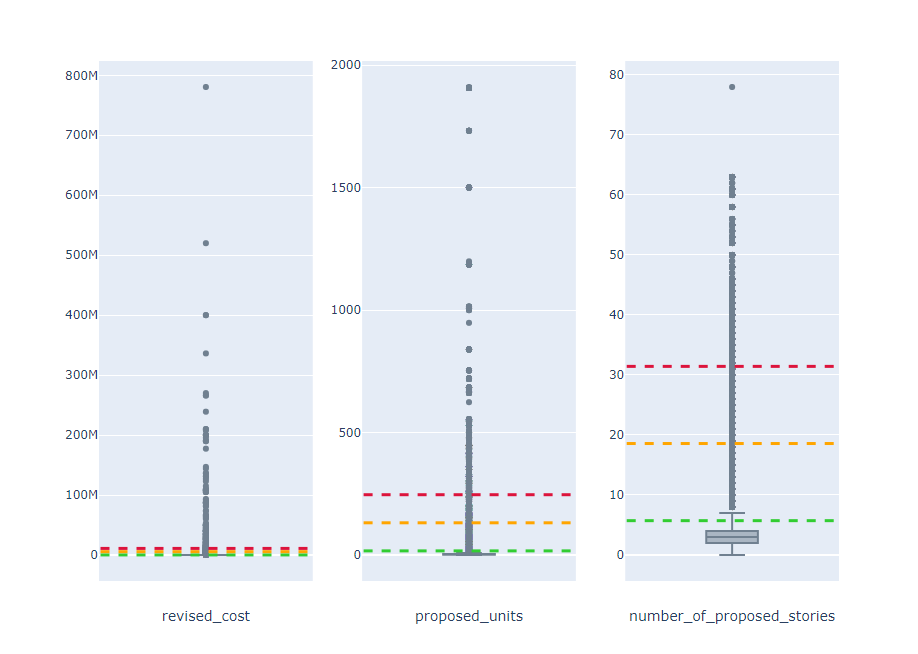

### __Visualización 2D de outliers con scatter plot__

Al visualizar los datos de la columna `'revisited_cost'` en función de los `'proposed_units'` y `''number_of_proposed_stories''`podemos tratar de dar mejor contexto a los outliers.

En este caso por ejemplo, tenemos outliers en el eje x y eje y de los que tenemos que hacer una investigación individual para entender mejor los datos:


En `'number_of_proposed_stories'` hay un dato con muy poco coste (12k) pero es el dato que afecta a más plantas (78).


En `'proposed_units'` hay un dato que es el que tiene máximo coste (780M) pero es un dato que afecta a una única unidad (1)

¿Tienen sentido estos datos? lo analizamos de forma más individual en el siguiente punto.


In [81]:
def show_scatter_plot(df, x_values, y_value, title=""):
    """
    Muestra un scatter plot por cada valor de x enviado frente a y.

    Args:
        df (DataFrame): Un DataFrame de Pandas.
        x_values (list): Listado de columnas de un DF para usar en x
        y_value (str): El nombre una columna en el DataFrame.
        title (str): El nombre para el subplot general.

    Returns:
        None
    """
    # Crea un panel para contener varios plots con 1 row y tantas columnas como plots.
    fig = make_subplots(1, len(x_values))

    # Crea un plot por columna
    for i, column in enumerate(x_values):
        fig.add_trace( # Selecciona en el panel el row=1 y col=i+1
            go.Scatter( # Agrega un plot Scatter con formas marker
                x=df[column], y=df[y_value],
                mode='markers'),
            row=1, col=i+1)
        
        # Agrega los títulos de los ejes x e y debajo de la posición del plot en el panel
        fig.update_xaxes(title_text=column, row=1, col=i+1)
        fig.update_yaxes(title_text=y_value, row=1, col=i+1)
        
    fig.update_layout(width=1200, height=700, showlegend=False, title_text=title)
    fig.show()

In [ ]:
# Evita renderizar el gráfico, pues ya hay una imagen.

# x_values = ['proposed_units', 'number_of_proposed_stories']
# y_value = 'revised_cost'

# show_scatter_plot(df_permits_cleaned, x_values, y_value, title="DF con outliers")

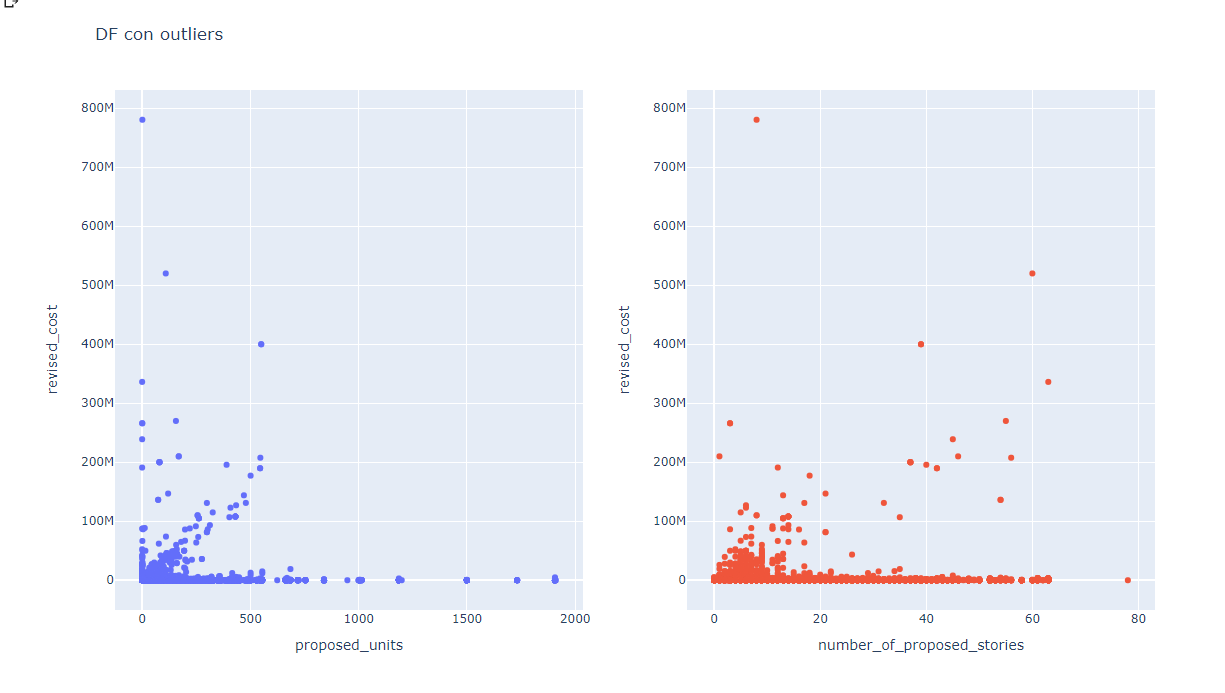

### __Análisis específico__

__¿Tiene sentido datos de costes que sean cero sobre muchas unidades o plantas?__ : En la selección se ve permisos de modificaciones de alarmas, modificaciones en la calle, que pueden ser realizadas por entes públicos o pueden estar incluídas en algún tipo de acuerdo para que sean gratuitas. Pueden por tanto afectar a muchas unidades o plantas y no tener un coste elevado por no necesitar un contrato con una empresa externa.

In [82]:
df_permits_cleaned[df_permits_cleaned['revised_cost'] == 0 ][['revised_cost', 'proposed_units', 'number_of_proposed_stories', 'description']].tail(3)

,revised_cost,proposed_units,number_of_proposed_stories,description
198876,0.0,1,2.0,street space
198878,0.0,4,2.0,to comply with nov 20174461 & 201714471 item #...
198885,0.0,1,2.0,revision to pa 2017-1128-4886 - reconfigure 2n...


__¿Tiene sentido datos de costes muy elevados sobre pocas unidades o pocas plantas?__ : En la selección se ve permisos que pueden afectar a la creación de muchas plantas pero que no hacen ninguna unidad de construcción, pueden afectar al interior de la unidad. También se ve la creación de conjuntos de unidades pero que no tienen porque tener plantas de un edificio.

In [83]:
df_permits_cleaned[df_permits_cleaned['revised_cost'] > 200000000][['revised_cost', 'proposed_units', 'number_of_proposed_stories', 'description']].head(3)

,revised_cost,proposed_units,number_of_proposed_stories,description
6687,336200000.0,0,63.0,"to erect 63 stories with 3 basements, office, ..."
52169,266061486.0,1,3.0,new roof with walking deck & perimeter surroun...
52170,266061486.0,0,3.0,"renov(e)moscone north & south bldg,increase gr..."


__¿Tiene sentido datos que afecten a muchas stories (plantas) y tengan bajo coste?__ En la selección se ven permisos de eliminación de elementos dentro de muchas plantas o revisiones de arquitectura. Esto no quiere decir que el coste tenga que ser elevado, puede ser necesario un permiso dentro del área de construcción en SF para estas tareas y acordar un precio bajo por algún motivo.


In [84]:
df_permits_cleaned[df_permits_cleaned['number_of_proposed_stories'] > 62][['number_of_proposed_stories', 'revised_cost', 'description']].head(3)

,number_of_proposed_stories,revised_cost,description
3533,63.0,10000.0,to erect 3 blade signs with intergrated lighti...
3534,63.0,10000.0,"replace toilet. replace all shower, fixts, add..."
6687,63.0,336200000.0,"to erect 63 stories with 3 basements, office, ..."


__¿Tiene sentido datos que afecten a ninguna stories (plantas) y tengan bajo coste o gran coste?__ : En la selección se ve permisos de instalación en exteriores y lugares públicos, por lo que puede no afectar a plantas de un edificio. Por otro lado, se ven instalaciones de esculturas públicas que no tienen coste y puede indicar que es un trabajo público y que no requiere una empresa externa.

In [85]:
df_permits_cleaned[df_permits_cleaned['number_of_proposed_stories'] == 0][['number_of_proposed_stories', 'revised_cost', 'description']].tail(3)

,number_of_proposed_stories,revised_cost,description
198897,0.0,1.0,street space
198898,0.0,1.0,street space permit
198899,0.0,1.0,street space permit


__¿Tiene sentido datos que afecten a muchas unidades y tengan bajo coste?__ : En la selección se ve permisos que afectan a muchas plantas, pero que el trabajo es de documentación o de cambiar pequeños elementos. Si el coste es sólo de material puede ser bajo y si la documentación se realiza de forma pública y no necesita un contrato externo puede ser muy barato.

In [86]:
df_permits_cleaned[df_permits_cleaned['proposed_units'] > 1700][['proposed_units', 'revised_cost', 'description']].head(3)

,proposed_units,revised_cost,description
13465,1907,1.0,document harddship for ballroom level (3rd fl)...
22382,1907,3250000.0,renovation of 566 guest rooms in tower 1 on fl...
28235,1907,20000.0,commercial tenant improvement to (e) lobby caf...


__¿Tiene sentido datos que no afecte a ninguna unidad y tengan bajo coste o gran coste?__ : En la selección se ve permisos de instalación de elementos y puede que sean caros pero que no sea una unidad de construcción, sino reparaciones o configuraciones nuevas en un edificio ya creado.

In [87]:
df_permits_cleaned[df_permits_cleaned['proposed_units'] == 0][['proposed_units', 'revised_cost', 'description']].head(3)

,proposed_units,revised_cost,description
97,0,40000.0,change of use/occupancy from existing grocery...
114,0,127180.0,interior (non-structural) alterations for new ...
123,0,96000.0,t24 electrical for work under 201703272389


### __Visualización del DF sin outliers a través de IQR__

Aunque los datos puedan tener sentido y no ser outliers por errores, puede ser interesante realizar análisis sobre un subset de permisos de los que consideramos outliers graves.

Al tener una serie de datos que no siguen una distribución normal, decidimos no utilizar métodos como la media y std o z-score y optar por extraer los outliers con IQR.

Creamos una función a la que le podemos pasar un listado de columnas y recorre cada columna analizando su franja IQR de outliers. Selecciona sólo las rows que no se encuentran entre los outliers.

In [88]:
def remove_outliers_iqr(df, columns, value=1.5):
    """
    Elimina rows de un DF basándose en detección de outliers en columnas específicas utilizando rangos intercuartílicos
    
    Args:
        df (DataFrame): Un DataFrame de Pandas.
        columns (list): Listado de columnas de un DF donde buscar outliers

    Returns:
        Copia del DataFrame sin outliers
    """

    df_filtered = df.copy()  # Create a copy of the DataFrame to avoid modifying the original

    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_iqr = q1 - value * iqr
        upper_iqr = q3 + value * iqr

        df_filtered = df_filtered[(df_filtered[column] >= lower_iqr) & (df_filtered[column] <= upper_iqr)]

    return df_filtered

Aunque el código sólo representa el caso de análisis sobre outliers graves de las 3 columnas a la vez, hemos realizado un análisis sobre las columnas individuales y sobre todos los posibles pares de columnas.

En este ejemplo, mostramos visualmente los datos, eliminando valores outliers de number_of_proposed_stories, a través de IQR.
* En proposed_units (azul) se observa una parte con tendencia que podría ser estudiada si eliminamos los valores 0 de revised_cost
*En number_of_proposed_stories (rojo), tenemos una gráfica que se aproxima a una distribución normal si le quitamos los outliers de costes altos.

In [89]:
x_columns = ['number_of_proposed_stories']
df_permits_no_std_outliers = remove_outliers_iqr(df_permits_cleaned, x_columns, value=3)

In [ ]:
# Evita renderizar el gráfico, pues ya hay una imagen.

# show_scatter_plot(df_permits_no_std_outliers, x_values=['proposed_units', 'number_of_proposed_stories'], y_value='revised_cost', title=f"{x_columns} iqr")

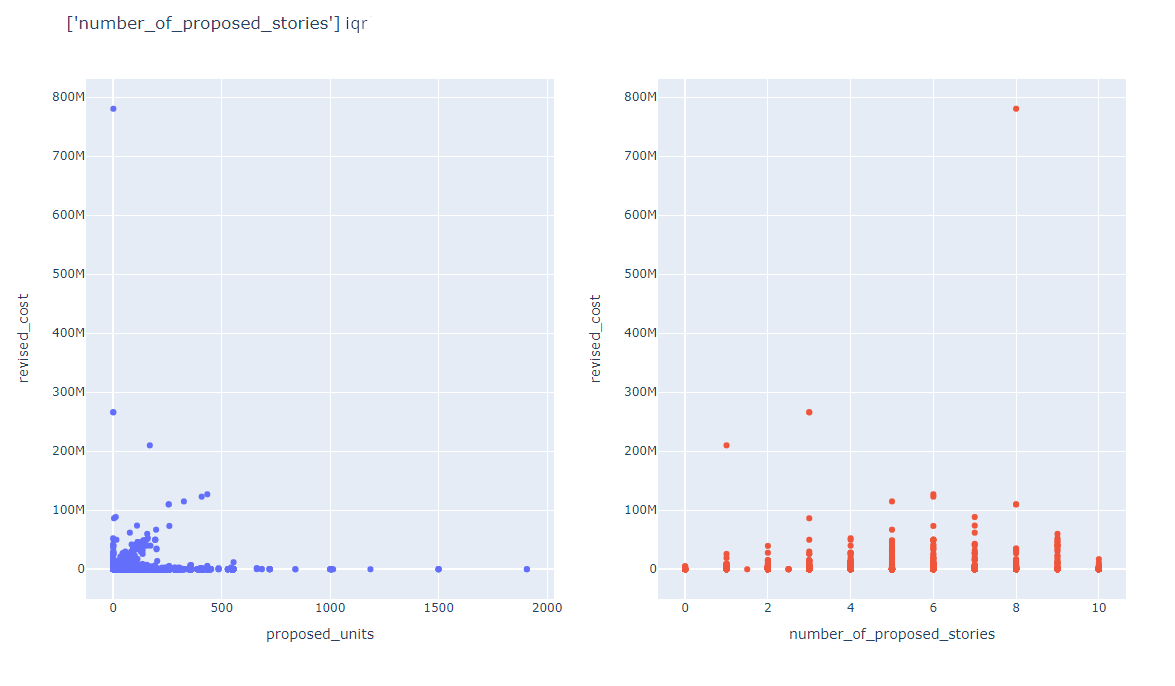


---
---

# __EJERCICIO 6__
> __Pretendemos ser capaces de extender nuestro caso de uso y ser capaces de aplicar algoritmos y técnicas de ML dentro de nuestros datos. En este sentido, una amplia variedad de estas técnicas implican la discretización de campos a valores numéricos que los algoritmos entiendan. En este sentido, ¿qué columnas discretizarías y de qué manera?__

---
---

## __SOLUCIÓN 6.1__

* `'current_status'` : Al tener 14 posibles estados hemos realizado un One-Hot encoding. De esta forma podemos preservar la individualidad de las categorías y permite tener una interpretación representable útil en ML

* `'existing_use'` y `'neighborhoods_-_analysis_boundaries'`: Al tener 94 y 41 posibles estados respectivamente, es preferible utilizar Frequency Encoding. Tienen muchos datos y es complicado que la frecuencia sea la misma para dos valores a la vez. Además, evitará un exceso de columnas como One-Hot encoding y permitirá guardar la frecuencia de estos datos, pudiendo er interesante para un modelo de ML.

* `'permit_creation_date'` : Al ser datetyme, es interesante guardar sus valores con Seno y Coseno para ver su componente cíclica mensual, que puede ser útil para un modelo de ML.

* `'structural_notification'` , `'fire_only_permit'` , `'site_permit'` , `'tidf_compliance'`: Son columnas que hicimos bool y que podemos pasarlas a int para aseguranos que funcione en cualquier escenario ML.

## __DESARROLLO 6.1__

### __Funciones custom de enconding__

In [90]:
def frequency_encoding(df, col):
# Analisis previo para ver si dos o más frecuencias coinciden y en ese caso abortar
    """
      Realiza una codificación de variables mediante el método de frecuencia, creando dos columnas (freq_enconded y label_encoded).

      Args:
          df (DataFrame): Un DataFrame de Pandas
          col (str): El nombre de una columna del DataFrame

      Returns:
          None
    """

    # Mapa de frecuencias de cada valor. normalize= True permite representar proporciones en vez de números
    frequency_map = df[col].value_counts(normalize=True)
    
    # Crea una columna de frecuencias y asigna con map la frecuencia en esa row según la columna enviada
    df[f'{col}_freq_encoded'] = df[col].map(frequency_map)

    # Crea una columna de label y asigna con map un ranking de la frecuencia (de menor 1 a mayor n) en esa row según la columna enviada
    df[f'{col}_label_encoded'] = df[col].map(frequency_map.rank())

    return df


def monthly_encoding(df, col):

    """
      Realiza una codificación de variables datetype mediante el método de cos y sen, creando dos columnas según el mes.

      Args:
        df (DataFrame): Un DataFrame de Pandas
        col (str): El nombre de una columna del DataFrame

      Returns:
        None
    """

    # Toma el mes de la columna datetyme enviada
    df['month'] = df[col].dt.month

    # Aplica transformaciones de seno y coseno para cada mes del año
    df[f'{col}_month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df[f'{col}_month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

    return df

### __Codificación de columnas__

In [91]:
df_permits_encoded = df_permits_cleaned.copy()

# One-Hot Encoding
one_hot_encoding = pd.get_dummies(df_permits_encoded['current_status'])
df_permits_encoded = pd.concat([df_permits_encoded, one_hot_encoding], axis=1)

# Codificacion mensual seno coseno
monthly_encoding(df_permits_encoded, 'permit_creation_date')

# Codificación de frecuencias
frequency_encoding(df_permits_encoded, 'neighborhoods_-_analysis_boundaries')
frequency_encoding(df_permits_encoded, 'existing_use')

# Codificación de int sobre las columnas bool
bool_cols = df_permits_encoded.select_dtypes(include=bool).columns
df_permits_encoded[bool_cols] = df_permits_encoded[bool_cols].astype(int)

---
---

# __EJERCICIO 7__
> __Define y crea un pipeline de manera que nuestro proceso de principio a fin quede lo más automatizado posible. Además, otra utilidad muy importante de los pipelines es que nos permiten ir guardando una traza de cómo van evolucionando nuestros datos a través del pipe y del ciclo de vida. De este modo, mantén un fichero de texto que vayas alimentando con cada paso del pipe y en el que se inserten de manera progresiva métricas como el número de valores nulos por columna en cada paso, el volumen de filas, el volumen de columnas, etc. puedes definir tantos KPIs como creas necesarios. Además, intenta que este archivo contenga datos que no sean genéricos, sino relacionados con el día y momento en que se ha lanzado el pipe.__

---
---

## __SOLUCIÓN 7.1__
* Primero hemos desarrollado una función para crear archivos HTML donde poder guardar información de los DF en formato table. Utilizando Jinja2, creamos diversas templates que son guardadas en un arhivo web, que permite hacer scroll horizontal, mejorando la visualización de los datos de las columnas y como cambian.

* Por último, actualizamos todas las funciones del proyecto para permitir un pipe de principio a fin, enviando el mismo df entre ellas sin tener que crear ninguna parte específica para el pipe. Entre cada paso se llama a la función que crea el template para generar una nueva traza.

## __DESARROLLO 7.1__

### __Creación de archivo HTML para trazar los stats__

In [92]:
# Guarda la librería en el Kernel actual, evitando desconexiones entre el Jupyter kernel y el Shell
import sys
!{sys.executable} -m pip install Jinja2

Defaulting to user installation because normal site-packages is not writeable


In [98]:
from jinja2 import Template
from datetime import datetime
import os


def save_stats_in_html(df, file_name, title):
    """
        Crea una plantilla HMTL para guardar tablas de estadísticas del DF en el pipeline

      Args:
        df (DataFrame): Un DataFrame de Pandas
        file_name (str): El nombre del file html donde escribir.
        title (str): Nombre del fichero

      Returns:
        Dataframe necesario para el pipeline
    """
    # Check if the file already exists
    if not os.path.exists(file_name):
        # Generate the base HTML file with table styles
        base_template = '''
        <!DOCTYPE html>
        <html lang="es">
        <head>
            <meta charset="UTF-8" />
            <meta name="viewport" content="width=device-width, initial-scale=1.0" />
            <meta name="description" content="Estadísticas del pipeline" />
            <title>Pipeline Stats</title>
            <style>
                * {
                    box-sizing: border-box;
                }
                body {
                    display: flex;
                    overflow-x: auto; /* Scroll horizontal */
                }
                .table-container {
                    margin: 40px;
                    flex: 0 0 auto; /* El contenido no crece */
                }
                .table-container table {
                    font-family: Arial, sans-serif;
                    border-collapse: collapse;
                    text-align: left;
                    width: 100%;
                    font-size: 0.8rem;
                }
                .table-container th,
                .table-container td {
                    border: 1px solid #ddd;
                    padding: 7px;
                }
                .table-container th {
                    background-color: #f2f2f2;
                    font-weight: bold;
                }
                .table-container tr:nth-child(even) {
                    background-color: #f4f4f4;
                }
                h1 {
                    text-align:center;
                    text-transform: uppercase;
                    font-size: 1rem;
                }
            </style>
        </head>
        '''
        with open(file_name, 'w') as file:
            file.write(base_template)

    # Concatenate the columns of the functions info_stats and calculate_nan_stats into a single DataFrame
    info_table = info_stats(df)
    nan_table = calculate_nan_stats(df)
    merged_df = pd.concat([info_table, nan_table], axis=1)
    df_stats_table = merged_df.to_html()

    # Prepare the data to be passed to the template
    data = {
        'title': title,
        'columns_number': df.shape[1],
        'rows_number': df.shape[0],
        'current_date': datetime.now().strftime("%d - %m - %Y"),
        'current_time': datetime.now().strftime("%H:%M:%S"),
        'df_stats_table': df_stats_table,
    }

    # Define the template for the HTML body content
    column_template = '''
    <div class="table-container">
        <table>
            <thead>
                <tr>
                    <th colspan="5"><h1>{{title}}<h1></th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td><b>Columnas:</b> {{columns_number}}</td>
                    <td><b>Filas:</b> {{rows_number}}</td>
                    <td><b>Fecha:</b> {{ current_date }}</td>
                    <td><b>Hora:</b> {{ current_time }}</td>
                </tr>
            </tbody>
        </table>
        {{ df_stats_table }}
    </div>
    '''

    with open(file_name, 'a') as file:
        template = Template(column_template)
        rendered_template = template.render(**data)
        file.write(rendered_template)

    return df  # Necessary for the pipeline

### __Pipeline__

In [101]:
df_permits_pipe = df_permits_source.copy()

# Columnas para Data Cleaning
to_int_columns = ['zipcode', 'unit', 'plansets','existing_units', 'existing_construction_type', 'proposed_construction_type', 'proposed_units', 'supervisor_district']
to_bool_columns = ['voluntary_soft-story_retrofit', 'structural_notification', 'fire_only_permit', 'site_permit', 'tidf_compliance']
to_delete_columns = ['estimated_cost', 'existing_use', 'existing_units']

# Nombre del archivo para guardar la traza de los stats
file_name = 'pipeline_stats_trace.html'

# Data Cleaning
df_cleaned_pipe = (
    df_permits_pipe
        .pipe(save_stats_in_html, file_name, title='Pipeline DF Base')

        .pipe(rename_to_snake_case)
        .pipe(save_stats_in_html, file_name, title='Renombrado a snake_case')

        .pipe(convert_to_datetime)
        .pipe(save_stats_in_html, file_name, title='Cast de columnas a datetime')

        .pipe(convert_to_int, columns=to_int_columns)
        .pipe(save_stats_in_html, file_name, title='Cast de columnas a int')

        .pipe(convert_to_bool, columns=to_bool_columns)
        .pipe(save_stats_in_html, file_name, title='Cast de columnas a bool')

        .pipe(delete_duplicated_values)
        .pipe(save_stats_in_html, file_name, title='Drop de duplicados')
        
        .pipe(convert_to_pdNA)
        .pipe(save_stats_in_html, file_name, title='Cast a pd.NA')

        .pipe(zipcode_from_location)
        .pipe(save_stats_in_html, file_name, title='Add Zipcodes desde location')
        
        .pipe(fill_na_values)
        .pipe(save_stats_in_html, file_name, title='Fill de nan values')

        .pipe(drop_series, axis='row', columns='zipcode', value=94014)
        .pipe(save_stats_in_html, file_name, title='Drop rows con zipcode outliers')

        .pipe(drop_series, axis='row', columns='permit_creation_date', value=2012)
        .pipe(save_stats_in_html, file_name, title='Drop rows de 2012 con pocos datos')

        .pipe(drop_series, axis='column', columns=to_delete_columns)
        .pipe(save_stats_in_html, file_name, title='Drop columnas de datos no actualizados')

        .pipe(frequency_encoding, col='neighborhoods_-_analysis_boundaries')
        .pipe(save_stats_in_html, file_name, title='Codificacion a frecuencias de neighborhoods')

        .pipe(monthly_encoding, col='permit_creation_date')
        .pipe(save_stats_in_html, file_name, title='Codificacion a sencos de permit_creation_date')
)

---
---

# __EJERCICIO 8: EXPERTISE COMO DATA SCIENCE__
>- __Plantea 3 productos de datos diferentes que sería interesante construir a raíz de nuestro dataset principal. Puedes plantear el enriquecimiento con otros conjuntos de datos.__
> - __Plantea 3 problemas que, en caso de no haber realizado el análisis y limpieza de datos, hubieran supuesto un daño importante para nuestro caso de estudio.__
> - __Hemos hecho este PoC y a nuestros compañeros del equipo les ha flipado. Nos han pedido una reunión en la que les ayudaría mucho que pudiéramos tener listo un modelo de datos asociado a nuestro PoC. ¿Cómo lo presentarías? (Hint: Ten en cuenta que ellos trabajan con estructuras de datos más fijas, relacionales y pensando en data warehouse para hacer analítica y reporting)__
> - __Esta semana se han incorporado al equipo dos analistas senior que están comenzando en el mundo de los datos, pero que tienen sobre todo experiencia con Excel y hojas de cálculo. ¿Cómo les presentarías el caso para que fueran más autónomos?__

---
---

## __DESARROLLO 8.1__


### __P1: 3 PRODUCTOS DE DATOS__

#### __Dashboard de visualización geolocalizada web__
Propuesta de visualización clara y efectiva de los datos relacionados con los permisos de construcción de San Francisco en un mapa web. A partir de la geolocalización de los permisos, se puede representar un mapa de calor 3D de cada variable filtrada. Por ejemplo, el coste de los permisos por barrio, la visualización de los permisos creados por los meses de forma dinámica o el tiempo de construcción.

* __Recopilación de datos__: Obtener los datos de permisos de construcción de San Francisco a través de fuentes gubernamentales o bases de datos públicas.

* __Preparación y limpieza de datos__: Realizar la limpieza y preparación de los datos con Pandas para garantizar su calidad y consistencia.

* __Geolocalización de los permisos__: Utilizar las direcciones o coordenadas geográficas proporcionadas en los datos de los permisos para geolocalizar cada punto de construcción. Se puede utilizar una herramienta de geocodificación como Geopy o plataformas como Google Maps API.

* __Mapa de calor 3D__: Representar los datos geolocalizados en un mapa de calor 3D para visualizar variables específicas, como el coste de los permisos por barrio, el tiempo de construcción u otros indicadores relevantes. Se pueden utilizar tecnologías de visualización como WebGL o bibliotecas como Three.js para crear la visualización en 3D.

* __Visualización dinámica de datos__: Implementar la capacidad de filtrar y visualizar los permisos de construcción por meses de forma dinámica. Se pueden utilizar librerías de visualización interactiva como Plotly para crear gráficos y tablas dinámicas web.

* __Desarrollo de la interfaz de usuario__: Diseñar y desarrollar una interfaz de usuario intuitiva y fácil de usar que muestre las visualizaciones geolocalizadas y los filtros interactivos. Se pueden utilizar tecnologías web como HTML, CSS y JavaScript, junto con frameworks como React o Angular, para construir la interfaz de usuario.

* __Integración con Power BI o Tableau__: Integrar las visualizaciones y los datos preparados en un software de análisis y visualización de datos como Power BI o Tableau. Estas herramientas proporcionan funcionalidades avanzadas de creación de dashboards interactivos y permiten compartir los resultados de manera sencilla.

#### __Modelo de pronóstico del desarrollo urbanístico de barrios con datos de criminalidad__

Propuesta de un modelo de aprendizaje automático para pronosticar el futuro desarrollo de los barrios de San Francisco, incorporando datos históricos de criminalidad de otras bases de datos. Esto permitiría al gobierno y otras entidades a conocer mejor a que barrios hay que proporcionar más recursos para su mejor desarrollo.

El proyecto se desglosaría en las siguientes etapas:
* __Recolección e integración de datos__: Recopilar datos históricos de los permisos de construcción y de criminalidad en los distritos, asegurándonos de que ambos tienen identificadores geográficos compatibles como zipcode o localización.
* __Preprocesamiento de datos__: Limpiado y procesado de los datos de ambos DF, creando características relevantes que muestren las tendencias de desarrollo históricas y las tasas de delincuencia.
* __Desarrollo del modelo__: Utilización de algoritmos de aprendizaje automático de machine learning o algoritmos de deep learning para crear un modelo de pronóstico. Se pueden utilizar bibliotecas como scikit-learn, TensorFlow o PyTorch en Python para el procesamiento de datos y la implementación del modelo.
* __Evaluación y validación del modelo__: Debemos evaluar el rendimiento del modelo de pronóstico, para asegurar que las predicciones son fiables, dividiendo el conjunto de datos en datos de entrenamiento y test.
* __Visualización e informes__: Utilizando gráficos, heatmapas y diagramas, se pueden definir documentos o visualizaciones de datos con Tableau o Grafana para generar paneles interactivos y poder presentar resultados.

#### __Herramienta de marketing para pequeñas obras__

Propuesta de un una herramienta para pronosticar posibles zonas de negocio de pequeñas obras durante el año, que permita a pequeñas empresas y autónomos,   enfocar las campañas de marketing a través de propaganda en buzones y puerta a puerta y poder realizar sugerencias a vecinos de areas con problemas específicos.

* __Recopilación de datos__: Recopilación de datos históricos relevantes que puedan influir en la demanda de pequeñas obras en diferentes áreas, como la actividad económica, la densidad de población, la edad de los edificios o la disponibilidad de infraestructuras.

* __Limpieza de datos__: Limpieza y procesado de los datos para que incluyan información geográfica y temporal relevante. Características como la cantidad de permisos de construcción en un área determinada durante períodos de tiempo específicos.

* __Desarrollo del modelo__: Implementación de un modelo SARIMAX para capturar tanto la componente temporal (estacionalidad) como las variables exógenas (datos demográficos o económicos) que influyen en la demanda de pequeñas obras en diferentes áreas.

* __Pronóstico y análisis de zonas de negocio__: Uso del modelo entrenado para hacer pronósticos de la demanda de pequeñas obras en diferentes áreas durante el año. Identifica las zonas que muestran un mayor potencial de negocio según los pronósticos generados con gráficos e información recopilada en formato pdf o web.

### __P2: 3 PROBLEMAS__

Hemos destacado los problemas entorno a las columnas temporales, pero muchos de estos conceptos son transversales a todas las columnas.

* __Conversión del tipo de dato según la naturaleza de la columna__. Sin una conversión adecuada a los dtypes necesarios, se podría paralizar nuestro análisis del ejercicio o un futuro modelo de ML. Esto sucede en los pasos del pipeline:  `.pipe(convert_to_datetime), .pipe(convert_to_int, columns=to_int_columns) y .pipe(convert_to_bool, columns=to_bool_columns).`
Un ejemplo práctico en este caso sería que los datos de fechas del df son string. Si no los pasamos a datetime, no podemos realizar las operaciones de Pandas disponibles para analizar en base al año, mes y día y visualizar los datos de forma correcta para su interpretación anual.

* __Análisis exploratorio y visualizaciones__ : Al realizar una correlación entre los permisos y los valores faltantes "NaN" por mes, obtenemos un 0.96 de correlación, lo que interpretamos como que la mayoría de los datos del DF son datos faltantes por no existir y no hay grandes picos de NaNs por fallos en el sistema. También vimos como durante el año 2012 casi no hay datos, pudiendo descartar, si queremos, las rows por falta de información. Sin análisis previos sencillos sobre el conjunto de datos, podemos llegar a conclusiones erróneas, eliminación de rows necesarias, mantendríamos ourliers de valores erróneos, etc.

* __Añadir columnas nuevas a partir de otras__. Este caso se observa claramente en la columna `'permit_creation_date'` que al ser datetyme requiere una recodificación en dos columnas "Seno" y "Coseno". De este modo podremos aportar el componente cíclico de los meses en los que se llevaron a cabo la creación de permisos.En caso de no haber llevado a cabo esta operación tendríamos dos problemas principalmente: A) El peso estadístico de cada uno de los meses (ej.Enero = 1; Diciembre = 12); B) La relación de cercanía entre meses que nos aportaría información de cara a series temporales entre otras operaciones.

### __P3: PRESENTACIÓN POC__

Planteariamos la utilización de alguna herramienta de visualización cómo Power BI, que nos permite compartir información con el equipo de forma interactiva de forma sencilla y facilitaría una fácil transmisión de nuestras ideas a través de una herramienta angular en el Business Inteligence (BI).

Se podría llevar a cabo una visualización en un dashboard con: 
* Informes del tiempo de construcción y del coste de permisos por barrios.
* Demostraciones interactivas con Power BI para explorar juntos los datos aplicando filtros.
* Visualizaciones cómo las que aportamos a lo largo del desarrollo de los ejercicios. 
* Creación de un modelo de predicción SARIMAX y simulación de futuros precios.

### __P4: ANALISTAS SENIOR__


* __Conceptos básicos de datos__: Realizaríamos una introducción a los conceptos de datos para que puedan empezar a aprender entorno a este área. Conceptos como la importancia de la limpieza y preparación de los datos, la creación de modelos predictivos y la visualización.

* __Enlazar con su experiencia__: Presentaríamos herramientas e interfaces de análisis de datos como "Mito", que les permite analizar datos complejos en JupiterLab con una interfaz al estilo Excel. Conseguiríamos darles una autonomía inicial, donde podrían potenciar sus "cross sectional skills", estableciendo un puente entre sus conocimientos previos y los conocimientos de datos que les dimos previamente.

* __Ejemplos prácticos__: Mostraríamos ejemplos con la misma base de datos de análisis o proyectos que se han realizado para que vean a gran escala como está todo relacionado. Desglosaríamos pequeños análisis y visualizaciones y como pueden desarrollarlo en Mito, para que realicen sus primeras exploraciones, limpiezas y visualizaciones de datos con el conocimiento adquirido en los dos pasos anteriores.